#Import

---



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
plt.style.use('ggplot')
import warnings
import itertools
import pandas as pd
from matplotlib import pyplot
from google.colab import drive
import os
from pathlib import Path


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/TSM/myProject/accidents_2016_2021.csv")


In [ ]:
df.set_index('Date', inplace=True)
df.index = pd.to_datetime(df.index, errors='coerce')

In [ ]:
df.shape

(5549870, 47)

# Data Preprocessing & Feature Engineering
---



Dataset1

In [ ]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Daily_Accident_Count'],
      dtype='object')

##Columns

In [ ]:
unique_c=df['Street'].unique()
print(unique_c)
unique_c.shape
import pandas as pd
from sklearn.preprocessing import LabelEncoder


df['Street'] = df['Street'].astype(str)

label_encoder = LabelEncoder()

df['Street'] = label_encoder.fit_transform(df['Street'])

print(df.head())


['I-70 E' 'Brice Rd' 'State Route 32' ... ' SE Dale Ln' ' San Marlo Way'
 '473-401 Cutoff Rd']
             ID   Source  Severity           Start_Time             End_Time  \
Date                                                                           
2016-02-08  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
2016-02-08  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2016-02-08  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
2016-02-08  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
2016-02-08  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

            Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Station  \
Date                                                              ...           
2016-02-08  39.865147 -84.058723      NaN      NaN          0.01  ...   False   
2016-02-08  39.928059 -82.831184      NaN      NaN          0.01  ...   False   
2016-02-08  39.06314

In [ ]:
unique_c=df['State'].unique()
print(unique_c)
unique_c.shape
import pandas as pd
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

df['State'] = label_encoder.fit_transform(df['State'])

state_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("State Mapping:", state_mapping)





['OH' 'WV' 'CA' 'FL' 'GA' 'SC' 'NE' 'IA' 'IL' 'MO' 'WI' 'IN' 'MI' 'NJ'
 'NY' 'CT' 'MA' 'RI' 'NH' 'PA' 'KY' 'MD' 'VA' 'DC' 'DE' 'TX' 'WA' 'OR'
 'AL' 'CO' 'LA' 'TN' 'NC' 'OK' 'KS' 'NM' 'UT' 'MN' 'AZ' 'NV' 'MS' 'ID'
 'AR' 'VT' 'ME' 'MT' 'WY' 'SD' 'ND']
State Mapping: {'AL': 0, 'AR': 1, 'AZ': 2, 'CA': 3, 'CO': 4, 'CT': 5, 'DC': 6, 'DE': 7, 'FL': 8, 'GA': 9, 'IA': 10, 'ID': 11, 'IL': 12, 'IN': 13, 'KS': 14, 'KY': 15, 'LA': 16, 'MA': 17, 'MD': 18, 'ME': 19, 'MI': 20, 'MN': 21, 'MO': 22, 'MS': 23, 'MT': 24, 'NC': 25, 'ND': 26, 'NE': 27, 'NH': 28, 'NJ': 29, 'NM': 30, 'NV': 31, 'NY': 32, 'OH': 33, 'OK': 34, 'OR': 35, 'PA': 36, 'RI': 37, 'SC': 38, 'SD': 39, 'TN': 40, 'TX': 41, 'UT': 42, 'VA': 43, 'VT': 44, 'WA': 45, 'WI': 46, 'WV': 47, 'WY': 48}


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


df_W = pd.DataFrame({
    'Wind_Direction': ['north', 'south', 'east', 'west', 'ene', 'variable', 'unknown', 'sse']
})


label_encoder = LabelEncoder()

df['Wind_Direction'] = df_W['Wind_Direction'].fillna('unknown')

df['Wind_Direction'] = label_encoder.fit_transform(df['Wind_Direction'])


unique_wind_directions = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Wind Direction Mapping:", unique_wind_directions)



Wind Direction Mapping: {nan: 0}


In [ ]:
import pandas as pd


df_C = pd.DataFrame({
    'Weather_Condition': ['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow', 'Haze',
                          'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow', None]  # Example with a NaN value
})

# Define the weather condition categories
def categorize_weather_condition(condition):
    # Check if the condition is a string
    if isinstance(condition, str):
        condition = condition.lower()
        if condition in ['clear', 'fair', 'mostly sunny', 'sunny', 'partly cloudy']:
            return 'Clear/Sunny'
        elif condition in ['overcast', 'cloudy', 'mostly cloudy', 'cloudy / windy']:
            return 'Cloudy'
        elif condition in ['light rain', 'rain', 'drizzle', 'light drizzle', 'heavy rain',
                           'light freezing rain', 'drizzle', 'rain showers', 'snow showers',
                           'thunderstorms and snow', 'snow', 'light snow', 'sleet', 'wintry mix']:
            return 'Precipitation'
        elif condition in ['fog', 'haze', 'shallow fog', 'mist', 'smoke', 'patches of fog',
                           'light haze', 'fog / windy']:
            return 'Fog/Haze'
        elif condition in ['thunderstorm', 'thunderstorms and rain', 'thunderstorms and snow',
                           'light thunderstorms and rain', 'heavy thunderstorms and rain',
                           'heavy t-storm', 'tornado', 'funnel cloud']:
            return 'Thunderstorms'
        else:
            return 'Other'  # For any unclassified conditions
    else:
        return 'Other'  # If the condition is not a string (like NaN or a number)

# Apply the categorization to the 'Weather_Condition' column
df['Weather_Condition'] = df_C['Weather_Condition'].apply(categorize_weather_condition)

# Print the updated DataFrame
print(df)


                   ID   Source  Severity           Start_Time  \
Date                                                            
2016-02-08        A-1  Source2         3  2016-02-08 05:46:00   
2016-02-08        A-2  Source2         2  2016-02-08 06:07:59   
2016-02-08        A-3  Source2         2  2016-02-08 06:49:27   
2016-02-08        A-4  Source2         3  2016-02-08 07:23:34   
2016-02-08        A-5  Source2         2  2016-02-08 07:39:07   
...               ...      ...       ...                  ...   
2019-08-23  A-7777757  Source1         2  2019-08-23 18:03:25   
2019-08-23  A-7777758  Source1         2  2019-08-23 19:11:30   
2019-08-23  A-7777759  Source1         2  2019-08-23 19:00:21   
2019-08-23  A-7777760  Source1         2  2019-08-23 19:00:21   
2019-08-23  A-7777761  Source1         2  2019-08-23 18:52:06   

                       End_Time  Start_Lat   Start_Lng   End_Lat    End_Lng  \
Date                                                                       

In [ ]:

bool_columns = df.select_dtypes(include=['bool']).columns

# Convert all boolean columns to numeric (0/1)
df[bool_columns] = df[bool_columns].astype(int)

print(df[bool_columns].head())


            Amenity  Bump  Crossing  Give_Way  Junction  No_Exit  Railway  \
Date                                                                        
2016-02-08        0     0         0         0         0        0        0   
2016-02-08        0     0         0         0         0        0        0   
2016-02-08        0     0         0         0         0        0        0   
2016-02-08        0     0         0         0         0        0        0   
2016-02-08        0     0         0         0         0        0        0   

            Roundabout  Station  Stop  Traffic_Calming  Traffic_Signal  \
Date                                                                     
2016-02-08           0        0     0                0               0   
2016-02-08           0        0     0                0               0   
2016-02-08           0        0     0                0               1   
2016-02-08           0        0     0                0               0   
2016-02-08      

In [ ]:
# Specify the columns you want to remove
columns_to_remove = ['ID', 'Source', 'Description', 'Zipcode', 'Country','City', 'Airport_Code','Timezone','Wind_Direction','Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight']

# Drop the specified columns
df = df.drop(columns=columns_to_remove)

# Check the updated DataFrame
print(df.head())


            Severity           Start_Time             End_Time  Start_Lat  \
Date                                                                        
2016-02-08         3  2016-02-08 05:46:00  2016-02-08 11:00:00  39.865147   
2016-02-08         2  2016-02-08 06:07:59  2016-02-08 06:37:59  39.928059   
2016-02-08         2  2016-02-08 06:49:27  2016-02-08 07:19:27  39.063148   
2016-02-08         3  2016-02-08 07:23:34  2016-02-08 07:53:34  39.747753   
2016-02-08         2  2016-02-08 07:39:07  2016-02-08 08:09:07  39.627781   

            Start_Lng  End_Lat  End_Lng  Distance(mi)  Street      County  \
Date                                                                        
2016-02-08 -84.058723      NaN      NaN          0.01  169152  Montgomery   
2016-02-08 -82.831184      NaN      NaN          0.01  120039    Franklin   
2016-02-08 -84.032608      NaN      NaN          0.01  242137    Clermont   
2016-02-08 -84.205582      NaN      NaN          0.01  169176  Montgomery  

In [ ]:
df.isnull().sum()

Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                 3166580
End_Lng                 3166580
Distance(mi)                  0
Street                        0
County                        0
State                         0
Weather_Timestamp         81916
Temperature(F)           114700
Wind_Chill(F)           1930086
Humidity(%)              121812
Pressure(in)              98176
Visibility(mi)           123985
Wind_Speed(mph)          510084
Precipitation(in)       2119197
Weather_Condition       5549870
Traffic_Signal                0
Daily_Accident_Count          0
dtype: int64

In [ ]:
# df.set_index('Date', inplace=True)
# df.index = pd.to_datetime(df.index, errors='coerce')

In [ ]:

df = df.select_dtypes(exclude=['object'])

print(df.head())


            Severity  Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  \
Date                                                                         
2016-02-08         3  39.865147 -84.058723      NaN      NaN          0.01   
2016-02-08         2  39.928059 -82.831184      NaN      NaN          0.01   
2016-02-08         2  39.063148 -84.032608      NaN      NaN          0.01   
2016-02-08         3  39.747753 -84.205582      NaN      NaN          0.01   
2016-02-08         2  39.627781 -84.188354      NaN      NaN          0.01   

            Street  State  Temperature(F)  Wind_Chill(F)  Humidity(%)  \
Date                                                                    
2016-02-08  169152     33            36.9            NaN         91.0   
2016-02-08  120039     33            37.9            NaN        100.0   
2016-02-08  242137     33            36.0           33.3        100.0   
2016-02-08  169176     33            35.1           31.0         96.0   
2016-02-08  187

In [ ]:
df.index

DatetimeIndex(['2016-02-08', '2016-02-08', '2016-02-08', '2016-02-08',
               '2016-02-08', '2016-02-08', '2016-02-08', '2016-02-08',
               '2016-02-08', '2016-02-08',
               ...
               '2019-08-23', '2019-08-23', '2019-08-23', '2019-08-23',
               '2019-08-23', '2019-08-23', '2019-08-23', '2019-08-23',
               '2019-08-23', '2019-08-23'],
              dtype='datetime64[ns]', name='Date', length=5549870, freq=None)

In [ ]:

!pip install statsmodels

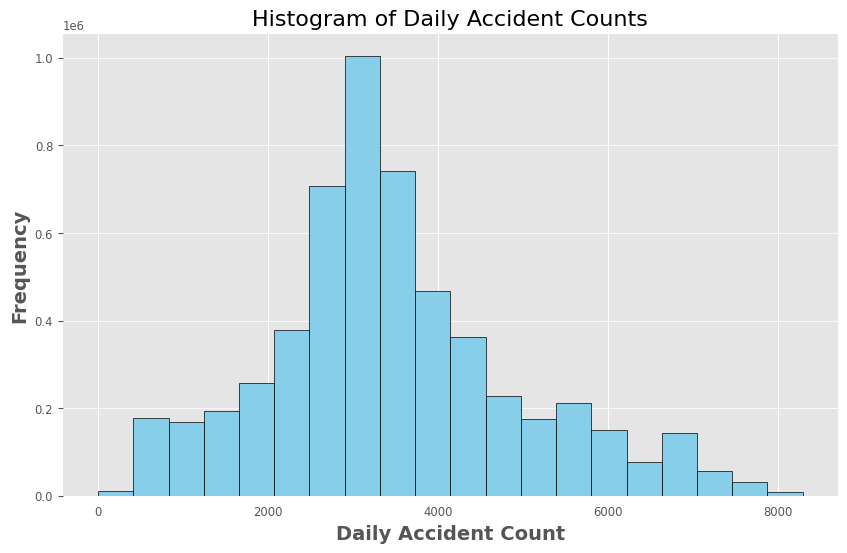

In [ ]:
import matplotlib.pyplot as plt

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Daily_Accident_Count'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Daily Accident Counts', fontsize=16)
plt.xlabel('Daily Accident Count', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.show()


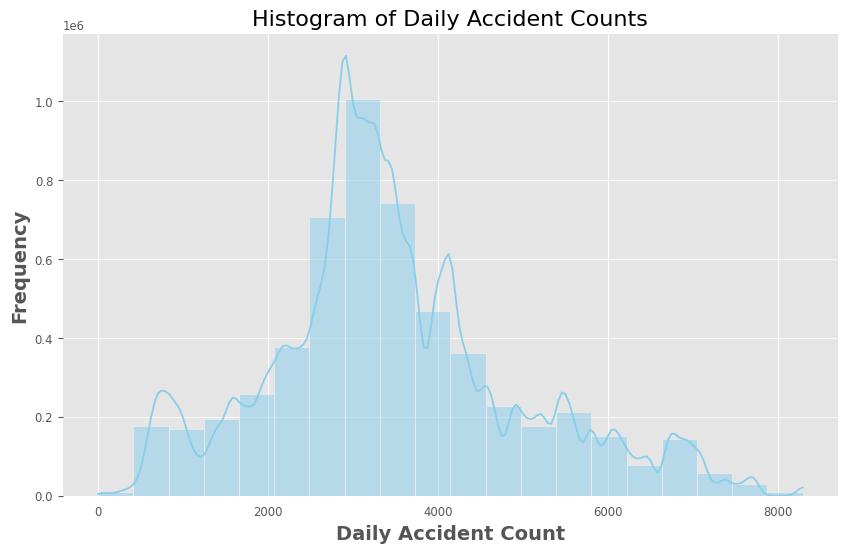

In [ ]:
import seaborn as sns

# Plot the histogram with Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['Daily_Accident_Count'], bins=20, kde=True, color='skyblue')  # kde=True adds a density curve
plt.title('Histogram of Daily Accident Counts', fontsize=16)
plt.xlabel('Daily Accident Count', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.show()


In [ ]:

df = df.select_dtypes(exclude=['object'])

print(df.head())


            Severity  Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  \
Date                                                                         
2016-02-08         3  39.865147 -84.058723      NaN      NaN          0.01   
2016-02-08         2  39.928059 -82.831184      NaN      NaN          0.01   
2016-02-08         2  39.063148 -84.032608      NaN      NaN          0.01   
2016-02-08         3  39.747753 -84.205582      NaN      NaN          0.01   
2016-02-08         2  39.627781 -84.188354      NaN      NaN          0.01   

            Street  State  Temperature(F)  Wind_Chill(F)  Humidity(%)  \
Date                                                                    
2016-02-08  169152     33            36.9            NaN         91.0   
2016-02-08  120039     33            37.9            NaN        100.0   
2016-02-08  242137     33            36.0           33.3        100.0   
2016-02-08  169176     33            35.1           31.0         96.0   
2016-02-08  187

In [ ]:
Month_data = df['Daily_Accident_Count'].resample('MS').mean()

# Display the result
print(Month_data.head())


Date
2016-01-01      7.000000
2016-02-01     62.329949
2016-03-01    584.597788
2016-04-01    767.578173
2016-05-01    793.195571
Freq: MS, Name: Daily_Accident_Count, dtype: float64


In [ ]:
df.shape

(5549870, 17)

<ipython-input-362-f6bed35f07cd>:12: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



<Figure size 1000x800 with 0 Axes>

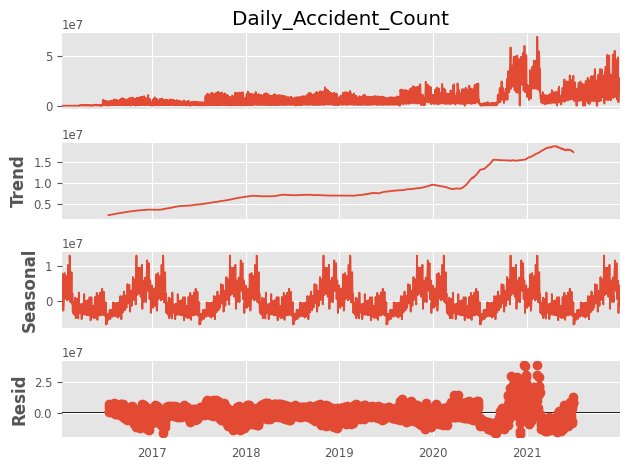

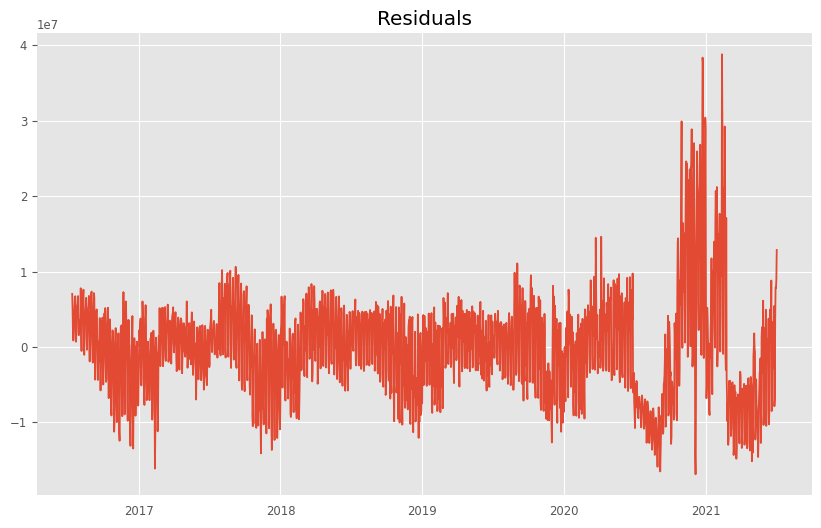

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


df['Daily_Accident_Count'] = df['Daily_Accident_Count'].fillna(method='ffill')  # Forward fill for NaNs

df= df.resample('D').sum()  # Resample to daily data (sum of accidents per day)


result = seasonal_decompose(df['Daily_Accident_Count'], model='additive', period=365)

plt.figure(figsize=(10, 8))
result.plot()

plt.show()


residuals = result.resid.dropna()  # Drop NaNs in residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.show()

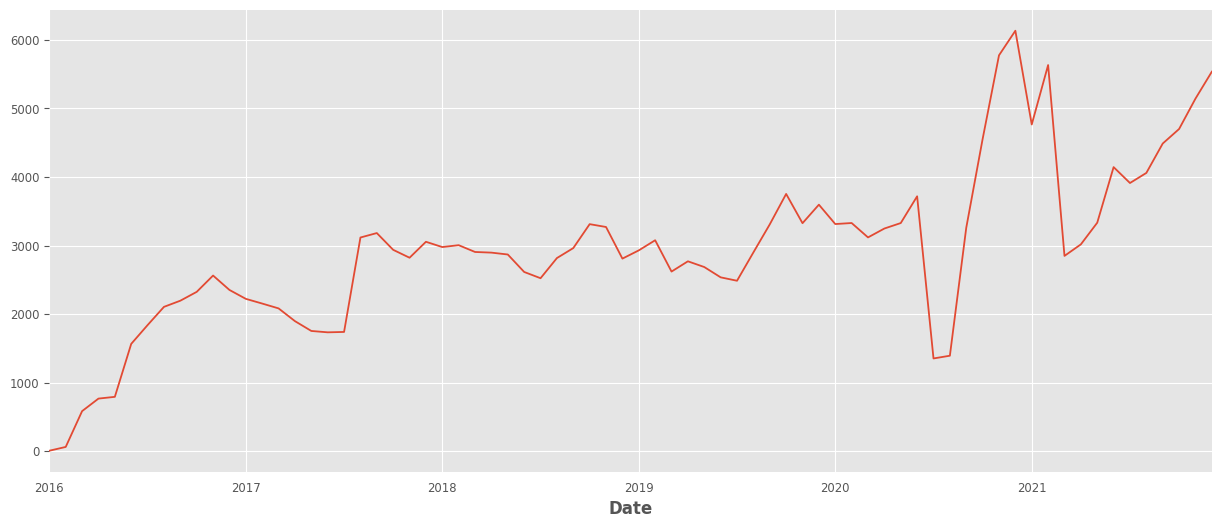

In [ ]:
Month_data.plot(figsize=(15, 6))
plt.show()

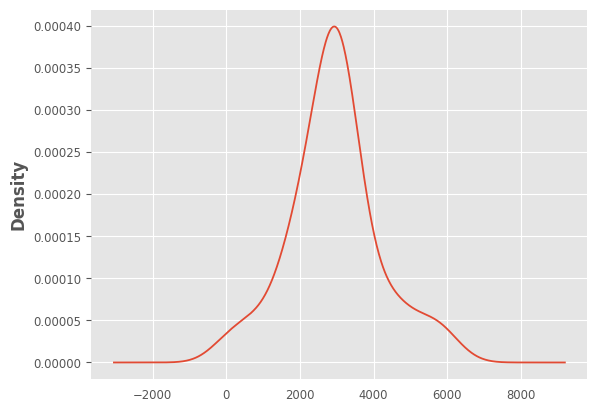

In [ ]:
Month_data.plot(kind='kde')
pyplot.show()

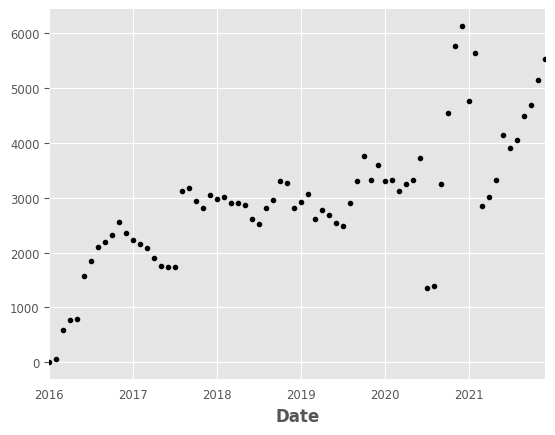

In [ ]:
Month_data.plot(style='k.')
pyplot.show()

Outliers

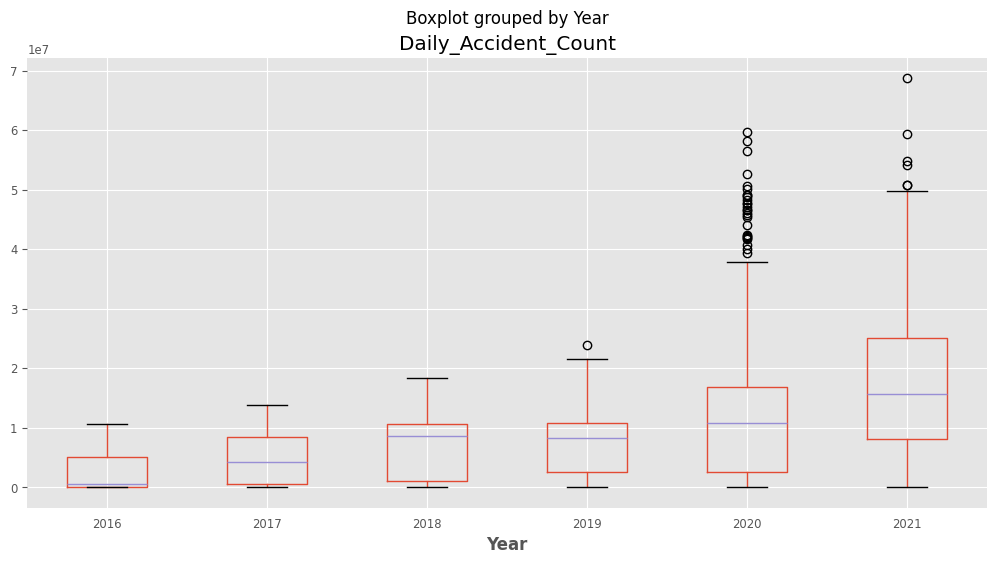

In [ ]:

groups = df.groupby(pd.Grouper(freq='YE'))

# Create a boxplot for each year
df['Year'] = df.index.year
df.boxplot(column='Daily_Accident_Count', by='Year', figsize=(12, 6))

# Show the plot
plt.show()

In [ ]:
# Calculate Q1, Q3, and IQR
Q1 = df['Daily_Accident_Count'].quantile(0.15)
Q3 = df['Daily_Accident_Count'].quantile(0.85)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Daily_Accident_Count'] < lower_bound) | (df['Daily_Accident_Count'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")
outliers


Number of outliers: 45


Severity      Start_Lat      Start_Lng        End_Lat  \
Date                                                                
2020-10-29     14153  237555.096026 -604598.759216  160022.117711   
2020-10-30     16016  271101.459871 -714646.944046  191662.161226   
2020-11-06     13336  228211.371199 -601857.464487  155549.964887   
2020-11-10     13727  234602.738439 -611681.798729  163184.352599   
2020-11-11     14685  254362.996300 -646513.557437  187555.421819   
2020-11-12     14523  246760.523674 -640732.335111  173505.023144   
2020-11-13     14744  251831.383093 -673915.708612  185492.446110   
2020-11-18     13587  230331.796470 -625302.524273  165752.600744   
2020-11-20     14672  247432.512066 -663446.005525  181875.206119   
2020-11-23     13377  225286.558431 -596889.365299  162179.534563   
2020-11-24     13651  229448.923799 -609571.236861  164067.131066   
2020-11-25     14940  251923.925122 -670631.376744  184477.627903   
2020-11-30     13704  230190.390670 -594010.673515  170664.759859   
2020-12-01     14256  242016.410286 -640960.045976  177584.831634   
2020-12-08     13168  221323.456918 -588640.362386  164833.459197   
2020-12-09     14646  245420.174822 -658306.082251  188385.521391   
2020-12-10     14304  242023.427578 -648490.088761  181191.407466   
2020-12-11     14482  243912.944882 -647946.697446  182435.439055   
2020-12-16     14420  243035.614774 -616019.660399  176561.380838   
2020-12-17     15308  264663.135643 -667834.170478  197454.299943   
2020-12-18     14195  237553.076452 -635540.382957  176359.653594   
2020-12-22     14264  240421.508014 -640108.145929  184652.222676   
2020-12-23     16164  279289.583239 -724446.224490  220556.292986   
2020-12-24     15764  278722.094634 -699601.188261  224579.152781   
2020-12-28     13659  230195.449138 -650004.234352  176385.884385   
2020-12-30     14893  262562.626318 -674981.414989  206627.870222   
2020-12-31     14311  243961.000214 -651528.026309  193308.460784   
2021-01-26     13418  229121.862412 -579968.711300  164910.931493   
2021-01-29     14098  236464.825426 -669201.870682  175162.202993   
2021-02-05     14136  239975.595576 -629092.208154  173866.037101   
2021-02-11     17451  297860.999849 -783877.075582  230098.390131   
2021-02-12     16242  286354.908913 -750485.316151  212498.984538   
2021-02-16     13709  231269.510371 -597379.028840  170191.393325   
2021-02-18     15598  272659.522171 -675674.776660  210538.542668   
2021-02-19     14458  243988.107793 -649938.600946  183504.232358   
2021-11-12     15175  256215.785964 -661630.392590  177686.313671   
2021-11-19     14942  246737.680137 -651009.053144  174084.486622   
2021-12-03     14964  247485.249933 -661868.885114  184927.908982   
2021-12-08     13496  225259.364374 -590790.440662  155589.553949   
2021-12-10     15645  265993.832929 -695216.872240  197185.214341   
2021-12-14     14138  239860.349569 -647907.499059  165733.020535   
2021-12-15     14343  242937.214500 -639972.438950  177745.123897   
2021-12-16     14148  238781.955012 -624656.662623  172019.018259   
2021-12-17     14266  238672.419025 -637740.076979  178921.060890   
2021-12-23     14606  246897.807359 -669957.620590  189331.290238   

                  End_Lng  Distance(mi)      Street   State  Temperature(F)  \
Date                                                                          
2020-10-29 -414245.478572   4398.061999   946642711  133967        410975.0   
2020-10-30 -515852.594522   4473.242999  1030427965  144804        430374.0   
2020-11-06 -419157.535702   4005.613001   881930994  124122        387424.0   
2020-11-10 -432473.927810   4424.354000   913481872  126136        391293.0   
2020-11-11 -478273.706871   4951.215999   964585956  144348        394672.0   
2020-11-12 -454858.793248   4377.024002   966148336  138211        394596.0   
2020-11-13 -503752.924142   4589.057003   941852508  135114        385004.0   
2020-11-18 -457489.659807   3773.561001   866703302  1149

In [ ]:

import plotly.graph_objects as go


daily_accident_count = df['Daily_Accident_Count']
daily_accident_count.name = 'Daily_Accident_Count'

weekly_average = daily_accident_count.rolling(window=7).mean()
monthly_average = daily_accident_count.rolling(window=30).mean()

# Plot using Plotly
fig = go.Figure()

# Add trace for daily accident count (dotted line)
fig.add_trace(go.Scatter(
    x=daily_accident_count.index,
    y=daily_accident_count.values,
    mode='lines',
    line=dict(color='blue', width=1, dash='dot'),
    name='Daily Accident Count'
))

# Add trace for weekly average (dashed line)
fig.add_trace(go.Scatter(
    x=weekly_average.index,
    y=weekly_average.values,
    mode='lines',
    line=dict(color='green', width=2, dash='dash'),
    name='Weekly Average'
))

# Add trace for monthly average (solid line)
fig.add_trace(go.Scatter(
    x=monthly_average.index,
    y=monthly_average.values,
    mode='lines',
    line=dict(color='red', width=2),
    name='Monthly Average'
))

# Update layout
fig.update_layout(
    title='Number of Accidents per Day with Weekly and Monthly Trends',
    xaxis_title='Date',
    yaxis_title='Number of Accidents',
    template='plotly_white'
)

fig.show()


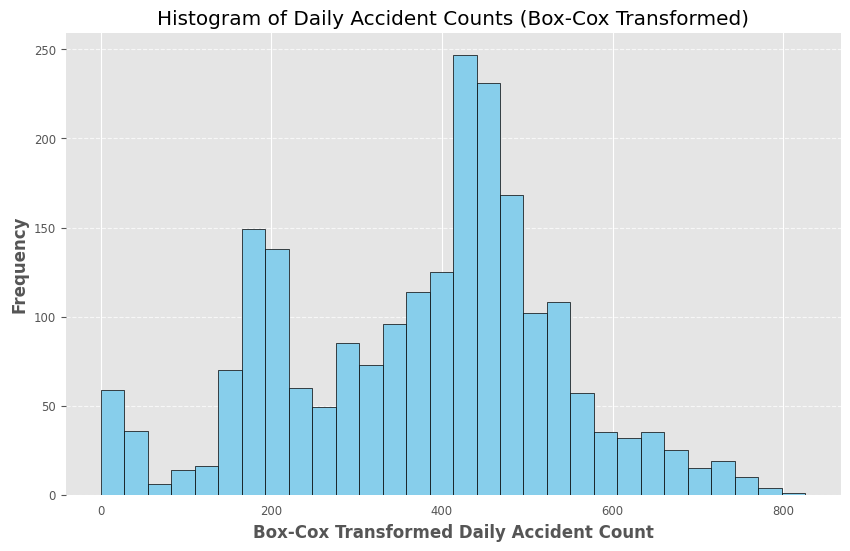

Box-Cox Transformation Lambda: 0.30696866129152744


In [ ]:
from scipy.stats import boxcox
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df= df.interpolate(method='linear')  # Linear interpolation for missing values


min_value = df['Daily_Accident_Count'].min()
if min_value <= 0:
    shift_value = abs(min_value) + 1
    df['Daily_Accident_Count'] += shift_value
else:
    shift_value = 0

df['Daily_Accident_Count'], lambda_bc = boxcox(df['Daily_Accident_Count'])

plt.figure(figsize=(10, 6))
df['Daily_Accident_Count'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Daily Accident Counts (Box-Cox Transformed)')
plt.xlabel('Box-Cox Transformed Daily Accident Count')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


print(f"Box-Cox Transformation Lambda: {lambda_bc}")



<Figure size 1000x800 with 0 Axes>

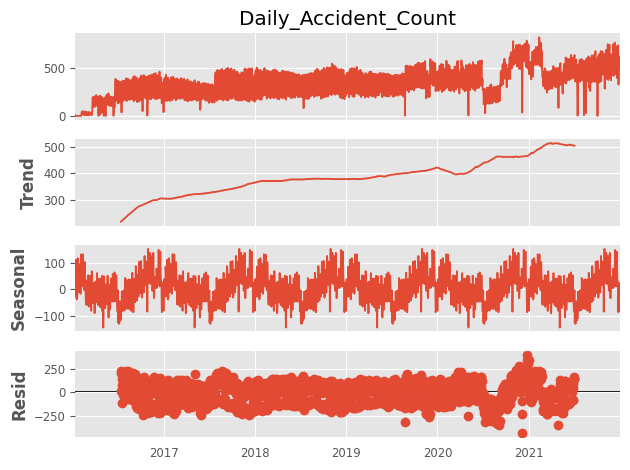

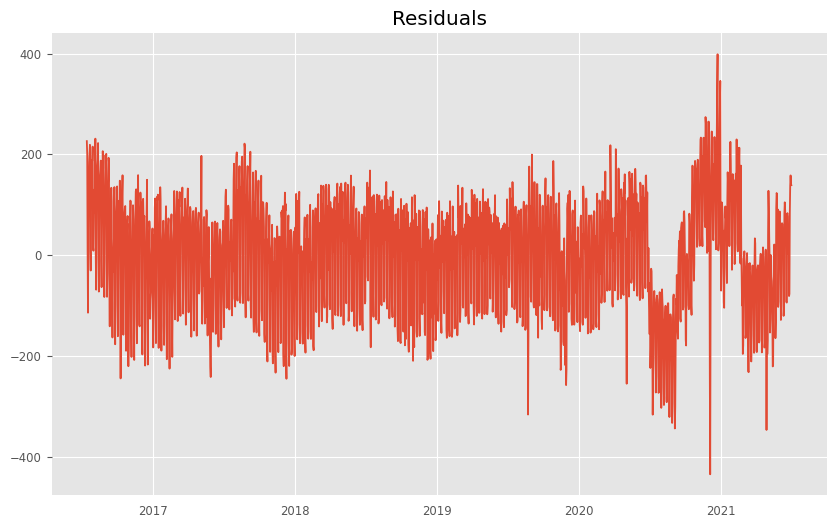

In [ ]:


result = seasonal_decompose(df['Daily_Accident_Count'], model='additive', period=365)

n
plt.figure(figsize=(10, 8))
result.plot()

plt.show()

residuals = result.resid.dropna()  # Drop NaNs in residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.show()

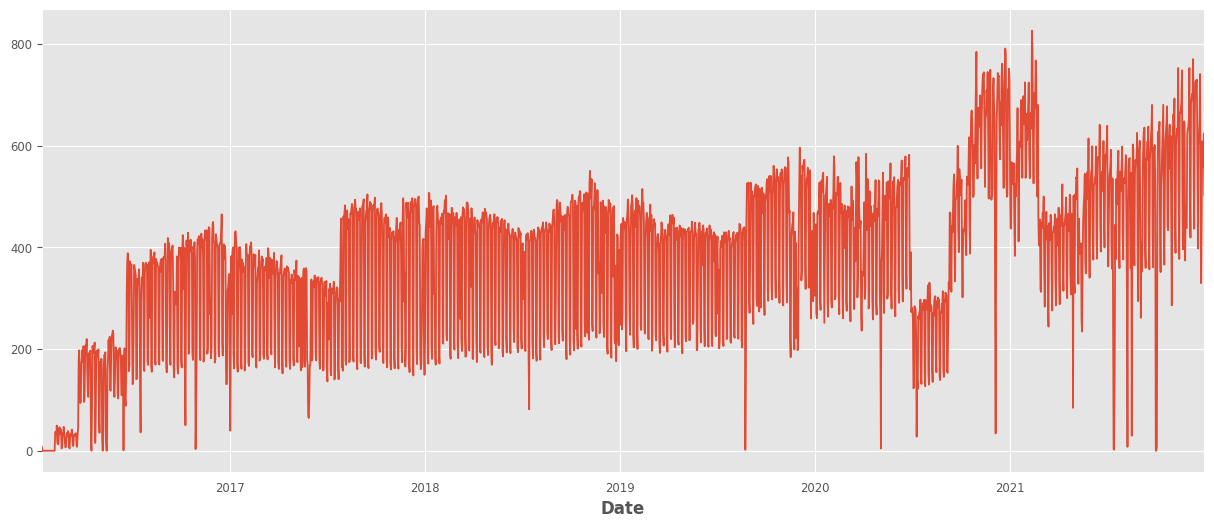

In [ ]:
df['Daily_Accident_Count'].plot(figsize=(15, 6))
plt.show()

## connection with Dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("donnetew/us-holiday-dates-2004-2021")

print("Path to dataset files:", path)
import kagglehub

# Download latest version
path = kagglehub.dataset_download("donnetew/us-holiday-dates-2004-2021")

print("Path to dataset files:", path)

# Use the path returned by kagglehub.dataset_download to read the CSV
dff = pd.read_csv(path + "/US Holiday Dates (2004-2021).csv")

Path to dataset files: /root/.cache/kagglehub/datasets/donnetew/us-holiday-dates-2004-2021/versions/1
Path to dataset files: /root/.cache/kagglehub/datasets/donnetew/us-holiday-dates-2004-2021/versions/1


In [ ]:


df.index = pd.to_datetime(df.index)

dff['Date'] = pd.to_datetime(dff['Date'])

In [ ]:
M_df = pd.merge(df, dff, on='Date', how='left')
print(M_df.head())

        Date  Severity   Start_Lat   Start_Lng     End_Lat     End_Lng  \
0 2016-01-14        28  284.414263 -528.294242  284.412044 -528.301879   
1 2016-01-15         0    0.000000    0.000000    0.000000    0.000000   
2 2016-01-16         0    0.000000    0.000000    0.000000    0.000000   
3 2016-01-17         0    0.000000    0.000000    0.000000    0.000000   
4 2016-01-18         0    0.000000    0.000000    0.000000    0.000000   

   Distance(mi)   Street  State  Temperature(F)  ...  Wind_Speed(mph)  \
0         0.427  1757294    252           217.0  ...             21.0   
1         0.000        0      0             0.0  ...              0.0   
2         0.000        0      0             0.0  ...              0.0   
3         0.000        0      0             0.0  ...              0.0   
4         0.000        0      0             0.0  ...              0.0   

   Precipitation(in)  Traffic_Signal  Daily_Accident_Count  Year_x  \
0                0.0               0          

In [ ]:
# Replace null values with 0 and non-null values with 1
M_df['Holiday'] = M_df['Holiday'].notna().astype(int)

print(M_df['Holiday'])


0       0
1       0
2       0
3       0
4       1
       ..
2175    0
2176    0
2177    0
2178    0
2179    1
Name: Holiday, Length: 2180, dtype: int64


In [ ]:
M_df.shape

(2180, 24)

In [ ]:

M_df.set_index('Date', inplace=True)

##Create additional time-related features

In [ ]:

M_df['Month'] = M_df.index.month
M_df['Quarter'] = M_df.index.quarter
M_df['WeekDay '] = M_df.index.dayofweek
M_df[' Day'] = M_df.index.day_name()
M_df['Year'] = M_df.index.year
# Display the first few rows
print(M_df.head())


            Severity   Start_Lat   Start_Lng     End_Lat     End_Lng  \
Date                                                                   
2016-01-14        28  284.414263 -528.294242  284.412044 -528.301879   
2016-01-15         0    0.000000    0.000000    0.000000    0.000000   
2016-01-16         0    0.000000    0.000000    0.000000    0.000000   
2016-01-17         0    0.000000    0.000000    0.000000    0.000000   
2016-01-18         0    0.000000    0.000000    0.000000    0.000000   

            Distance(mi)   Street  State  Temperature(F)  Wind_Chill(F)  ...  \
Date                                                                     ...   
2016-01-14         0.427  1757294    252           217.0          217.0  ...   
2016-01-15         0.000        0      0             0.0            0.0  ...   
2016-01-16         0.000        0      0             0.0            0.0  ...   
2016-01-17         0.000        0      0             0.0            0.0  ...   
2016-01-18     

##Use rolling statistics

In [ ]:
M_df['Rolling_MA_7'] = M_df['Daily_Accident_Count'].rolling(window=7).mean()


M_df['Rolling_MA_14'] = M_df['Daily_Accident_Count'].rolling(window=14).mean()

M_df['Rolling_SD_7'] = M_df['Daily_Accident_Count'].rolling(window=7).std()

In [ ]:

import plotly.graph_objects as go

# Count the number of accidents per day
daily_accident_count = df['Daily_Accident_Count']


Rolling_MA_7=daily_accident_count.rolling(window=7).mean()
Rolling_SD_7=daily_accident_count.rolling(window=7).std()
Rolling_MA_14=daily_accident_count.rolling(window=14).mean()

# Plot using Plotly
fig = go.Figure()


fig.add_trace(go.Scatter(
    x=Rolling_MA_7.index,
    y=Rolling_MA_7.values,
    mode='lines',
    line=dict(color='green', width=2, dash='dash'),
    name='Rolling_MA_7'
))


fig.add_trace(go.Scatter(
    x=Rolling_MA_7.index,
    y=Rolling_MA_7.values,
    mode='lines',
    line=dict(color='red', width=2),
    name='Rolling_MA_14'
))
fig.add_trace(go.Scatter(
    x=Rolling_SD_7.index,
    y=Rolling_SD_7.values,
    mode='lines',
    line=dict(color='blue', width=2),
    name='Rolling_SD_7'
))

# Update layout
fig.update_layout(
    title='Number of Accidents per Day with rolling statistics',
    xaxis_title='Date',
    yaxis_title='Number of Accidents',
    template='plotly_white'
)

fig.show()


##Generate lagged features

In [ ]:
import pandas as pd


M_df['Lag1'] = M_df['Daily_Accident_Count'].shift(1)  # Lag 1: ISE value from the previous day
M_df['Lag2'] = M_df['Daily_Accident_Count'].shift(2)  # Lag 2: ISE value from two days ago
M_df['Lag3'] = M_df['Daily_Accident_Count'].shift(3)  # Lag 3: ISE value from three days ago


In [ ]:

import plotly.graph_objects as go

daily_accident_count = df['Daily_Accident_Count']

lag1=daily_accident_count.shift(1)
lag2=daily_accident_count.shift(2)
lag3=daily_accident_count.shift(3)

# Plot using Plotly
fig = go.Figure()


fig.add_trace(go.Scatter(
    x=lag1.index,
    y=lag1.values,
    mode='lines',
    line=dict(color='green', width=2, dash='dash'),
    name='Lag 1'
))


fig.add_trace(go.Scatter(
    x=lag2.index,
    y=lag2.values,
    mode='lines',
    line=dict(color='red', width=2),
    name='Lag 2'
))
fig.add_trace(go.Scatter(
    x=lag3.index,
    y=lag3.values,
    mode='lines',
    line=dict(color='blue', width=2),
    name='Lag 3'
))

# Update layout
fig.update_layout(
    title='Number of Accidents per Day Lags',
    xaxis_title='Date',
    yaxis_title='Number of Accidents',
    template='plotly_white'
)

fig.show()


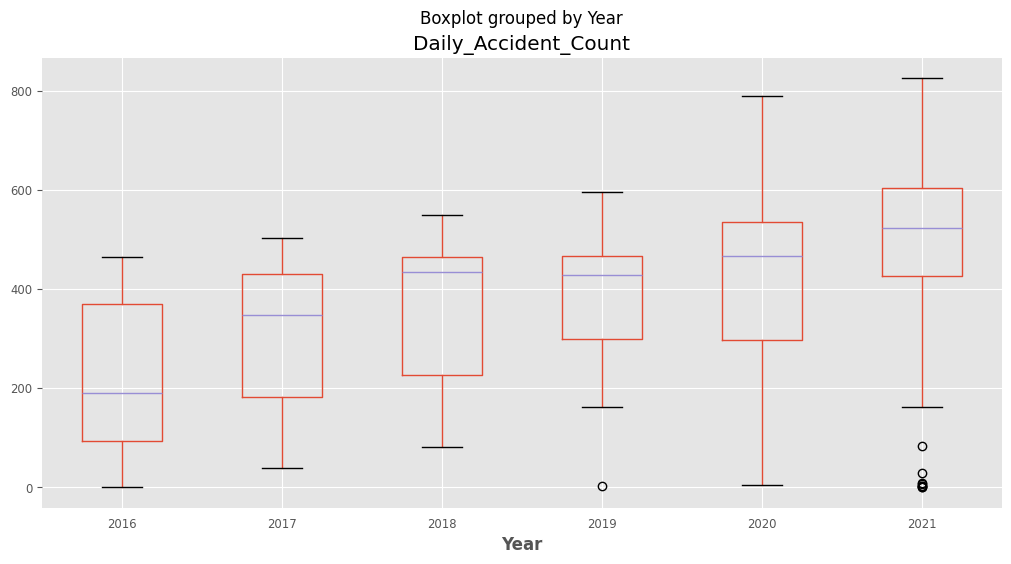

In [ ]:

groups = M_df.groupby(pd.Grouper(freq='YE'))

# Create a boxplot for each year
M_df['Year'] = M_df.index.year  # Add a 'year' column to your DataFrame
M_df.boxplot(column='Daily_Accident_Count', by='Year', figsize=(12, 6))

# Show the plot
plt.show()

##Seasonality/trend patterns.

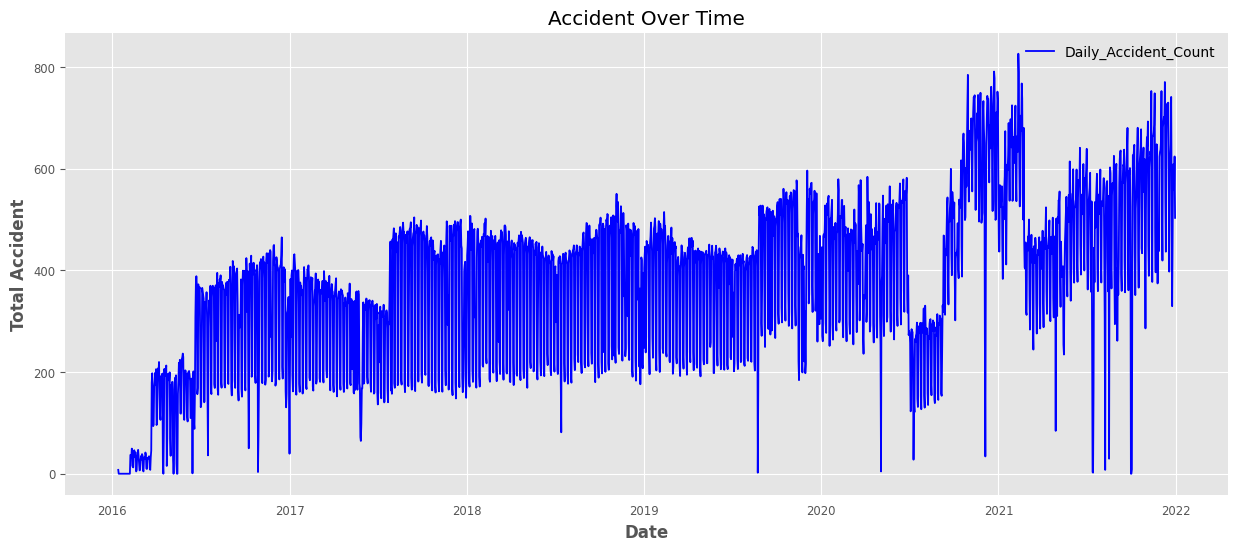

In [ ]:
# Plot the time series data
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Daily_Accident_Count'], label='Daily_Accident_Count', color='blue')
plt.title('Accident Over Time')
plt.xlabel('Date')
plt.ylabel('Total Accident')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
Q1 = M_df['Daily_Accident_Count'].quantile(0.15)
Q3 = M_df['Daily_Accident_Count'].quantile(0.85)

# Calculate the IQR
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1 * IQR
upper_bound = Q3 + 1 * IQR


outliers = M_df[(M_df['Daily_Accident_Count'] < lower_bound) | (M_df['Daily_Accident_Count'] > upper_bound)]

num_outliers = outliers.shape[0]

print(f"Number of outliers: {num_outliers}")


Number of outliers: 0


#3.Stationarity Check

---



In [ ]:
X = M_df['Daily_Accident_Count']
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=306.768639, mean2=446.341428
variance1=20922.357357, variance2=20945.414694


In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Extract the 'Daily_Accident_Count' column as a series
X = M_df['Daily_Accident_Count']

# Perform the Augmented Dickey-Fuller test
result = adfuller(X)

# Display the results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[1] <= 0.05:
    print("The time series is stationary (reject the null hypothesis).")
else:
    print("The time series is non-stationary (fail to reject the null hypothesis).")

ADF Statistic: -3.192899
p-value: 0.020399
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
The time series is stationary (reject the null hypothesis).


# Classic Time Series Models

---



In [ ]:
train_size = int(len(M_df) * 0.8)
train, val= M_df['Daily_Accident_Count'][:train_size], M_df['Daily_Accident_Count'][train_size:]

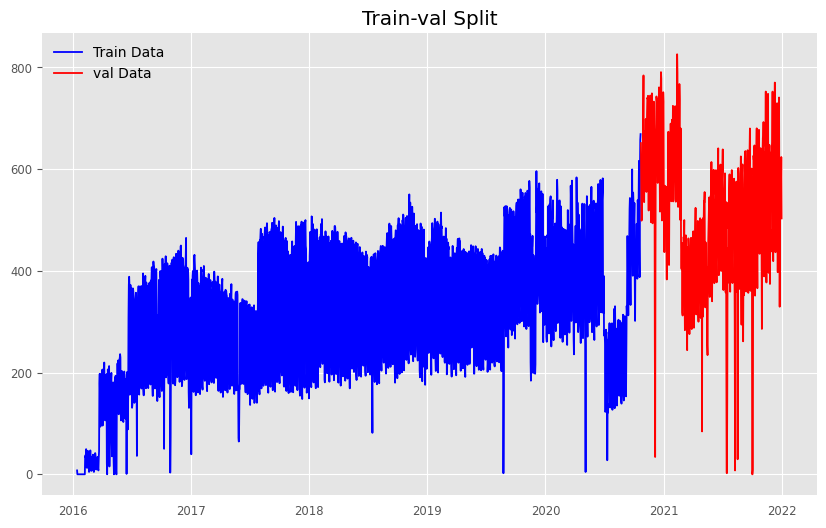

In [ ]:


plt.figure(figsize=(10, 6))
plt.plot(train, label="Train Data", color='blue')
plt.plot(val, label="val Data", color='red')
plt.title("Train-val Split")
plt.legend()
plt.show()


In [ ]:
M_df.shape

(2180, 33)

In [ ]:
!pip install darts

In [ ]:
M_df.to_csv('M_df.csv')

1.Naïve forecast

---



<ipython-input-311-e6a9a7cada53>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



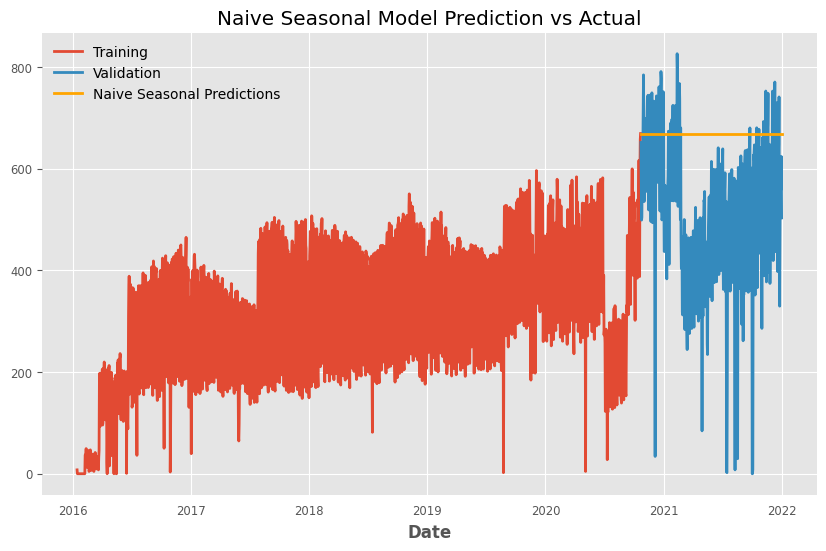

Forecast Errors:
 Date
2020-10-22    -17.593721
2020-10-23    -94.972657
2020-10-24   -170.130225
2020-10-25   -164.258532
2020-10-26    -67.540455
                 ...    
2021-12-27    -60.599836
2021-12-28    -98.604415
2021-12-29   -110.136420
2021-12-30    -45.033300
2021-12-31   -165.764304
Freq: D, Length: 436, dtype: float64
Bias: -144.083167
MAE: 159.302659
MSE: 41542.279524
RMSE: 203.819232


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import NaiveSeasonal
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt


M_df = M_df[~M_df.index.duplicated()]


M_df['Daily_Accident_Count'] = M_df['Daily_Accident_Count'].interpolate(method='nearest')


ts = TimeSeries.from_series(M_df['Daily_Accident_Count'], fill_missing_dates=True, freq='D')

train_size = int(len(M_df) * 0.8)
train, val = ts[:train_size], ts[train_size:]

model = NaiveSeasonal()

model.fit(train)

predictions = model.predict(len(val))


plt.figure(figsize=(10, 6))
train.plot(label="Training")
val.plot(label="Validation")
predictions.plot(label="Naive Seasonal Predictions", color='orange')
plt.legend()
plt.title("Naive Seasonal Model Prediction vs Actual")
plt.show()

predictions_df = predictions.pd_dataframe()
val_df = val.pd_dataframe()

comparison_df = pd.DataFrame({
    'expected': val_df['Daily_Accident_Count'],
    'predicted': predictions_df['Daily_Accident_Count']
}).dropna()


expected_cleaned = comparison_df['expected']
predicted_cleaned = comparison_df['predicted']


forecast_errors = expected_cleaned - predicted_cleaned
print('Forecast Errors:\n', forecast_errors)


bias = forecast_errors.mean()
print('Bias: %f' % bias)


mae = mean_absolute_error(expected_cleaned, predicted_cleaned)
print('MAE: %f' % mae)


mse = mean_squared_error(expected_cleaned, predicted_cleaned)
print('MSE: %f' % mse)

rmse = sqrt(mse)
print('RMSE: %f' % rmse)


2.Moving average forecast

---



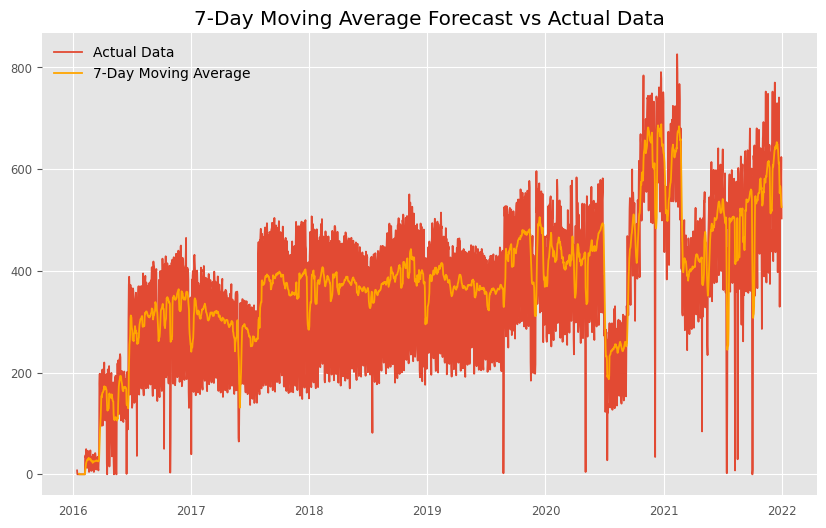

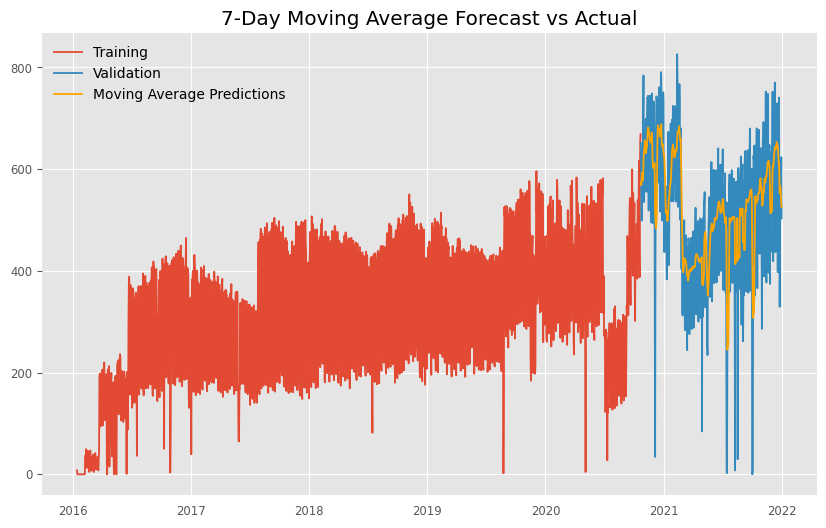

Forecast Errors: [ 7.66985832e+01  5.37268309e+00 -7.70554640e+01 -8.78926642e+01
  7.58935318e+00 -1.58784241e+01  6.98886235e+01  1.32623458e+02
  1.67040791e+02 -3.65516154e+01 -1.00051329e+02 -2.67220501e-01
  1.79539710e+01 -1.65011130e+01 -6.48676142e+00  6.73904070e+01
 -1.14005649e+01 -8.32609086e+01  1.88950967e+01  6.52925734e+01
  7.93959191e+01  6.23636810e+01  6.22366404e+01 -6.20769919e+01
 -1.57380161e+02 -2.24352356e+01 -7.21553453e+00  4.56624706e+01
  3.12787588e+01  8.88250453e+01 -4.01360632e+01 -1.56311058e+02
  4.33002357e+01  4.22804769e+01  7.71794655e+01 -8.41442765e+01
 -1.25863711e+02 -9.97401072e+01 -9.29537419e+01  1.02523987e+02
  1.22378890e+02  7.88305149e+01  3.88532691e+01 -3.09530637e+02
 -4.78730638e+02 -8.89086937e+01  1.57727181e+02  2.11514079e+02
  2.50298610e+02  2.30388444e+02  1.65967743e+02 -2.21312294e+01
 -1.07846818e+02 -1.63122765e+00 -3.85132825e+01  5.19408080e+01
  8.10298039e+01  4.88555377e+01 -7.54662867e+01 -1.48362040e+02
  1.4377

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt


M_df = M_df[~M_df.index.duplicated()]


window_size = 7

M_df['Moving_Avg'] = M_df['Daily_Accident_Count'].rolling(window=window_size).mean()

plt.figure(figsize=(10, 6))
plt.plot(M_df['Daily_Accident_Count'], label="Actual Data")
plt.plot(M_df['Moving_Avg'], label=f"{window_size}-Day Moving Average", color='orange')
plt.legend()
plt.title(f"{window_size}-Day Moving Average Forecast vs Actual Data")
plt.show()


train_size = int(len(M_df) * 0.8)
train = M_df['Daily_Accident_Count'][:train_size]
val = M_df['Daily_Accident_Count'][train_size:]


predictions = M_df['Moving_Avg'].iloc[train_size:].dropna()

plt.figure(figsize=(10, 6))
plt.plot(train, label="Training")
plt.plot(val, label="Validation")
plt.plot(predictions, label="Moving Average Predictions", color='orange')
plt.legend()
plt.title(f"{window_size}-Day Moving Average Forecast vs Actual")
plt.show()


val = val[len(val) - len(predictions):]

forecast_errors = val.values - predictions.values
print('Forecast Errors:', forecast_errors)


bias = forecast_errors.mean()
print('Bias:', bias)

mae = mean_absolute_error(val, predictions)
print('MAE:', mae)

mse = mean_squared_error(val, predictions)
print('MSE:', mse)

rmse = sqrt(mse)
print('RMSE:', rmse)


3.Exponential smoothing (ETS)

---



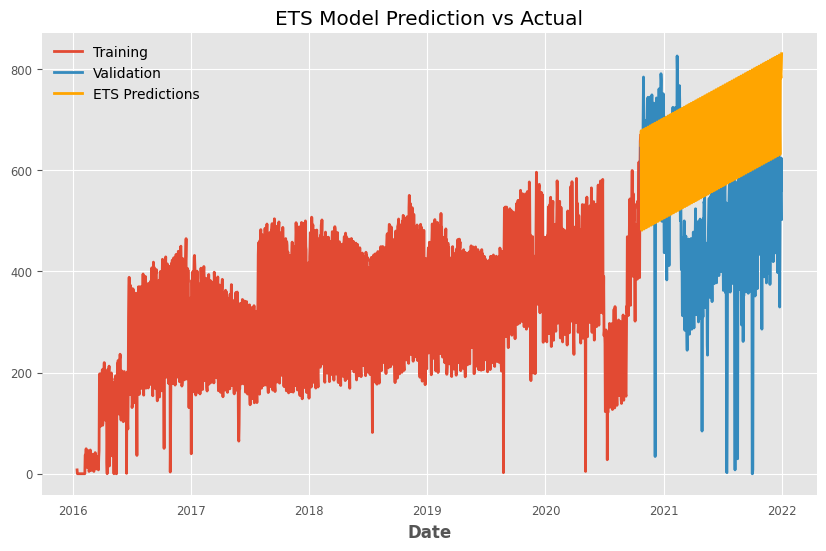

Forecast Errors: Date
2020-10-22      2.175419
2020-10-23   -104.215093
2020-10-24    -29.711310
2020-10-25     23.238888
2020-10-26    -31.038101
                 ...    
2021-12-27   -173.852261
2021-12-28   -219.224040
2021-12-29   -223.537801
2021-12-30   -177.473935
2021-12-31   -327.216516
Freq: D, Name: Daily_Accident_Count, Length: 436, dtype: float64
Bias: -156.660633
MAE: 172.843225
MSE: 43639.445262
RMSE: 208.900563


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
ts = TimeSeries.from_dataframe(M_df, value_cols='Daily_Accident_Count', fill_missing_dates=True)


train_size = int(len(M_df) * 0.8)
train, val = ts[:train_size], ts[train_size:]


model = ExponentialSmoothing()

model.fit(train)


predictions = model.predict(len(val))


plt.figure(figsize=(10, 6))
train.plot(label="Training")
val.plot(label="Validation")
predictions.plot(label="ETS Predictions", color='orange')
plt.legend()
plt.title("ETS Model Prediction vs Actual")
plt.show()


predictions_df = predictions.pd_dataframe()
val_df = val.pd_dataframe()

expected = val_df['Daily_Accident_Count']
predicted = predictions_df['Daily_Accident_Count']


forecast_errors = expected - predicted
print('Forecast Errors: %s' % forecast_errors)

bias = forecast_errors.mean()
print('Bias: %f' % bias)

mae = mean_absolute_error(expected, predicted)
print('MAE: %f' % mae)

mse = mean_squared_error(expected, predicted)
print('MSE: %f' % mse)

rmse = sqrt(mse)
print('RMSE: %f' % rmse)

4.ARIMA&AutoARIMA

---



/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



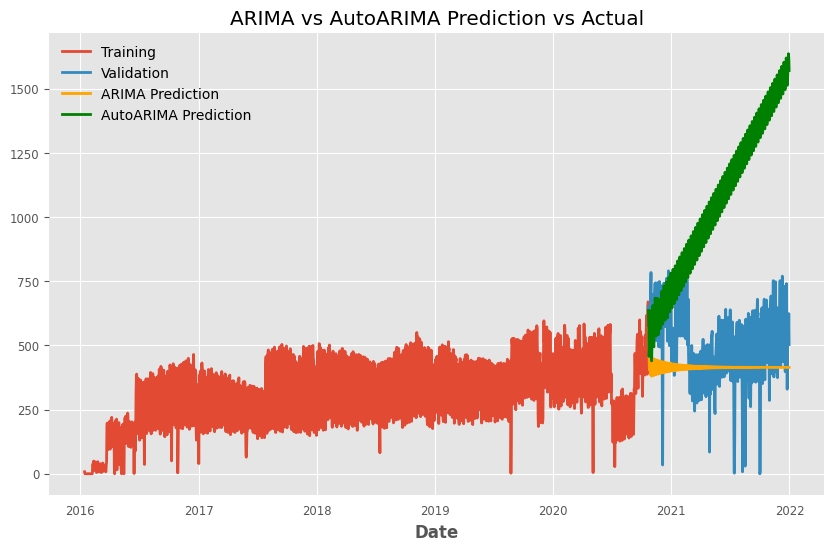

ARIMA Forecast Errors: Date
2020-10-22     85.226698
2020-10-23     24.891675
2020-10-24     38.142544
2020-10-25     99.115490
2020-10-26    147.967587
                 ...    
2021-12-27    193.905568
2021-12-28    155.827848
2021-12-29    144.424407
2021-12-30    209.542477
2021-12-31     88.680014
Freq: D, Name: Daily_Accident_Count, Length: 436, dtype: float64
ARIMA Bias: 109.545771
ARIMA MAE: 148.705196
ARIMA MSE: 32576.168931
ARIMA RMSE: 180.488695
AutoARIMA Forecast Errors: Date
2020-10-22      15.186148
2020-10-23      -6.893085
2020-10-24      41.553903
2020-10-25      18.212496
2020-10-26      43.226529
                 ...     
2021-12-27    -947.159777
2021-12-28   -1039.045530
2021-12-29   -1078.247438
2021-12-30    -995.585294
2021-12-31   -1068.606726
Freq: D, Name: Daily_Accident_Count, Length: 436, dtype: float64
AutoARIMA Bias: -537.362911
AutoARIMA MAE: 550.805799
AutoARIMA MSE: 407108.592800
AutoARIMA RMSE: 638.050619


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import ARIMA, AutoARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

series = TimeSeries.from_dataframe(M_df, value_cols='Daily_Accident_Count')


train_size = int(len(M_df) * 0.8)
train, val = series[:train_size], series[train_size:]


arima_model = ARIMA(p=3, d=1, q=3, seasonal_order=(0, 0, 0, 12))


auto_arima_model = AutoARIMA(max_p=5, max_q=3, m=12, seasonal=True)


arima_model.fit(train)
arima_model_prediction = arima_model.predict(len(val))

auto_arima_model.fit(train)
auto_arima_model_prediction = auto_arima_model.predict(len(val))


plt.figure(figsize=(10, 6))
train.plot(label="Training")
val.plot(label="Validation")
arima_model_prediction.plot(label="ARIMA Prediction", color='orange')
auto_arima_model_prediction.plot(label="AutoARIMA Prediction", color='green')
plt.legend()
plt.title("ARIMA vs AutoARIMA Prediction vs Actual")
plt.show()

arima_predictions_df = arima_model_prediction.pd_dataframe()
auto_arima_predictions_df = auto_arima_model_prediction.pd_dataframe()
val_df = val.pd_dataframe()

arima_expected = val_df['Daily_Accident_Count']
arima_predicted = arima_predictions_df['Daily_Accident_Count']


auto_arima_expected = val_df['Daily_Accident_Count']
auto_arima_predicted = auto_arima_predictions_df['Daily_Accident_Count']

arima_forecast_errors = arima_expected - arima_predicted
print('ARIMA Forecast Errors: %s' % arima_forecast_errors)

arima_bias = arima_forecast_errors.mean()
print('ARIMA Bias: %f' % arima_bias)

arima_mae = mean_absolute_error(arima_expected, arima_predicted)
print('ARIMA MAE: %f' % arima_mae)


arima_mse = mean_squared_error(arima_expected, arima_predicted)
print('ARIMA MSE: %f' % arima_mse)


arima_rmse = sqrt(arima_mse)
print('ARIMA RMSE: %f' % arima_rmse)


auto_arima_forecast_errors = auto_arima_expected - auto_arima_predicted
print('AutoARIMA Forecast Errors: %s' % auto_arima_forecast_errors)


auto_arima_bias = auto_arima_forecast_errors.mean()
print('AutoARIMA Bias: %f' % auto_arima_bias)

auto_arima_mae = mean_absolute_error(auto_arima_expected, auto_arima_predicted)
print('AutoARIMA MAE: %f' % auto_arima_mae)


auto_arima_mse = mean_squared_error(auto_arima_expected, auto_arima_predicted)
print('AutoARIMA MSE: %f' % auto_arima_mse)

auto_arima_rmse = sqrt(auto_arima_mse)
print('AutoARIMA RMSE: %f' % auto_arima_rmse)


In [ ]:
pip install pmdarima


5.Theta Forecast

---



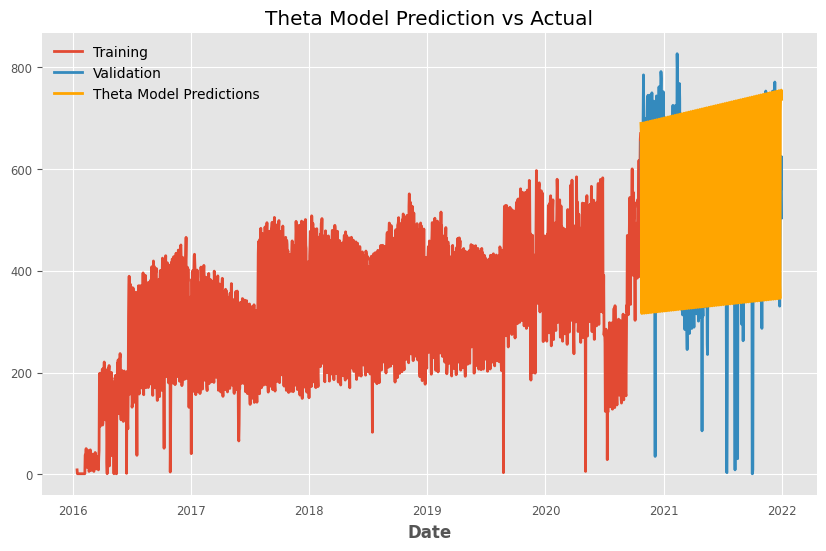

Forecast Errors: Date
2020-10-22    -37.495355
2020-10-23    -98.361106
2020-10-24    159.466100
2020-10-25    189.568886
2020-10-26    -49.929214
                 ...    
2021-12-27   -103.980485
2021-12-28   -173.853456
2021-12-29   -182.946074
2021-12-30   -130.549251
2021-12-31   -233.182307
Freq: D, Name: Daily_Accident_Count, Length: 436, dtype: float64
Bias: -77.839418
MAE: 134.896941
MSE: 30948.415700
RMSE: 175.921618


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import Theta
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt


M_df = M_df[~M_df.index.duplicated(keep='first')]


if (M_df['Daily_Accident_Count'] <= 0).any():
    M_df['Daily_Accident_Count'] += abs(M_df['Daily_Accident_Count'].min()) + 1


ts = TimeSeries.from_dataframe(M_df, None, 'Daily_Accident_Count', fill_missing_dates=True, freq='D')


train_size = int(len(ts) * 0.8)
train, val = ts[:train_size], ts[train_size:]


model = Theta(theta=10)

# Fit the model on the training data
model.fit(train)

# Predict the same length as the validation set
predictions = model.predict(len(val))

# Plot the results: Training, Validation, and Predictions
plt.figure(figsize=(10, 6))
train.plot(label="Training")
val.plot(label="Validation")
predictions.plot(label="Theta Model Predictions", color='orange')
plt.legend()
plt.title("Theta Model Prediction vs Actual")
plt.show()

predictions_df = predictions.pd_dataframe()
val_df = val.pd_dataframe()

expected = val_df['Daily_Accident_Count']
predicted = predictions_df['Daily_Accident_Count']

forecast_errors = expected - predicted
print('Forecast Errors: %s' % forecast_errors)

bias = forecast_errors.mean()
print('Bias: %f' % bias)

mae = mean_absolute_error(expected, predicted)
print('MAE: %f' % mae)

mse = mean_squared_error(expected, predicted)
print('MSE: %f' % mse)


rmse = sqrt(mse)
print('RMSE: %f' % rmse)


# Supervised Machine Learning Models

---



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the 

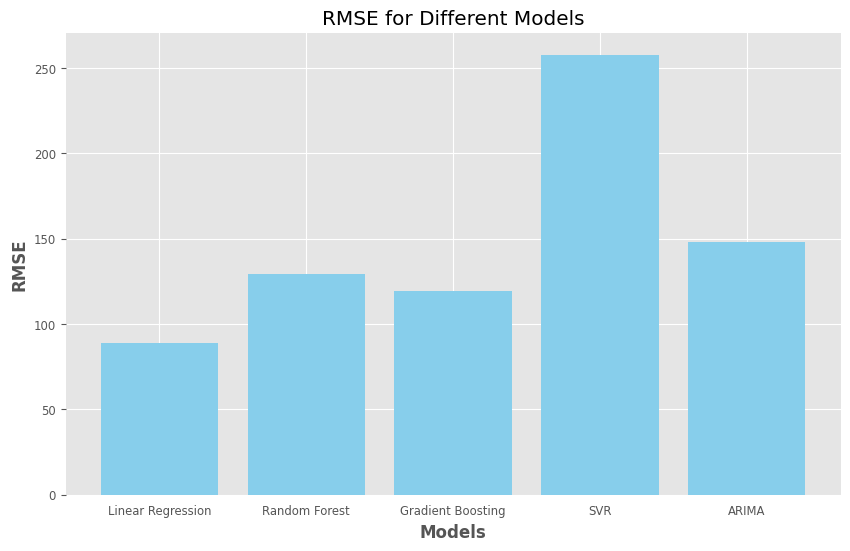

Linear Regression:
MAE: 68.2572
MSE: 7931.4000
RMSE: 89.0584
--------------------------------------------------
Random Forest:
MAE: 102.8571
MSE: 16699.2465
RMSE: 129.2256
--------------------------------------------------
Gradient Boosting:
MAE: 97.7263
MSE: 14302.8519
RMSE: 119.5945
--------------------------------------------------
SVR:
MAE: 222.3306
MSE: 66492.1415
RMSE: 257.8607
--------------------------------------------------
ARIMA:
MAE: 122.6880
MSE: 21937.8794
RMSE: 148.1144
--------------------------------------------------


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from statsmodels.tsa.arima.model import ARIMA
from darts import TimeSeries


# Prepare the time series data
ts = M_df['Daily_Accident_Count']

# Step 1: Feature Engineering
M_df['Lag1'] = M_df['Lag1']
M_df['Lag2'] =M_df['Lag2']
M_df['day_of_week'] = M_df.index.dayofweek
M_df['month'] = M_df.index.month
M_df['year'] = M_df.index.year


M_df = M_df.dropna()


# Step 2: Train/Test Split
train_size = int(len(M_df) * 0.8)
train, test = M_df[:train_size], M_df[train_size:]

X_train = train[['Lag1', 'Lag2', 'day_of_week', 'month', 'year']]
y_train = train['Daily_Accident_Count']
X_test = test[['Lag1', 'Lag2', 'day_of_week', 'month', 'year']]
y_test = test['Daily_Accident_Count']

# Step 3: Apply Different Models

# 1. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
lr_mae = mean_absolute_error(y_test, lr_preds)
lr_mse = mean_squared_error(y_test, lr_preds)
lr_rmse = sqrt(lr_mse)

# 2. Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_mse = mean_squared_error(y_test, rf_preds)
rf_rmse = sqrt(rf_mse)

# 3. Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)
gb_mae = mean_absolute_error(y_test, gb_preds)
gb_mse = mean_squared_error(y_test, gb_preds)
gb_rmse = sqrt(gb_mse)

# 4. Support Vector Regressor
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_preds = svr_model.predict(X_test)
svr_mae = mean_absolute_error(y_test, svr_preds)
svr_mse = mean_squared_error(y_test, svr_preds)
svr_rmse = sqrt(svr_mse)

# 5. ARIMA
arima_model = ARIMA(y_train, order=(5, 1, 0))  # ARIMA order can be optimized based on ACF/PACF plots
arima_model_fit = arima_model.fit()
arima_preds = arima_model_fit.forecast(len(y_test))
arima_mae = mean_absolute_error(y_test, arima_preds)
arima_mse = mean_squared_error(y_test, arima_preds)
arima_rmse = sqrt(arima_mse)

# Step 4: Display Model Results

models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'SVR', 'ARIMA']
mae_scores = [lr_mae, rf_mae, gb_mae, svr_mae, arima_mae]
mse_scores = [lr_mse, rf_mse, gb_mse, svr_mse, arima_mse]
rmse_scores = [lr_rmse, rf_rmse, gb_rmse, svr_rmse, arima_rmse]

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_scores, color='skyblue')
plt.title('RMSE for Different Models')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.show()

# Print detailed results
for model, mae, mse, rmse in zip(models, mae_scores, mse_scores, rmse_scores):
    print(f'{model}:')
    print(f'MAE: {mae:.4f}')
    print(f'MSE: {mse:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print('-' * 50)


##**LinearRegression**


Mean Squared Error: 1847.3428586513985


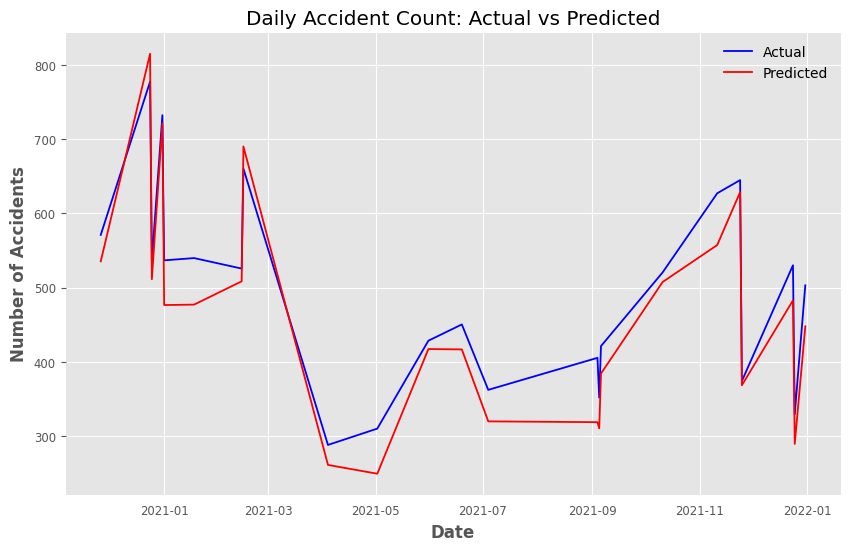

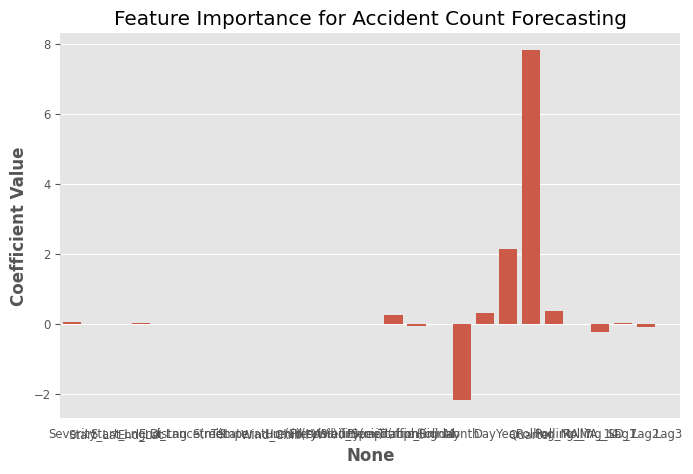

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns



train_size = int(len(M_df) * 0.8)
train, test = M_df[:train_size], M_df[train_size:]

X_train = train[['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Street', 'State', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Traffic_Signal',
       'Holiday',  'Month', 'Day', 'Year', 'Quarter', 'Rolling_MA_7', 'Rolling_MA_14', 'Rolling_SD_7', 'Lag1',
       'Lag2', 'Lag3'
       ]]

y_train = train['Daily_Accident_Count']
X_test = test[['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Street', 'State', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Traffic_Signal',
       'Holiday',  'Month', 'Day', 'Year', 'Quarter', 'Rolling_MA_7', 'Rolling_MA_14', 'Rolling_SD_7', 'Lag1',
       'Lag2', 'Lag3'
       ]]
y_test = test['Daily_Accident_Count']
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot actual vs predicted
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='red')
plt.title("Daily Accident Count: Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Number of Accidents")
plt.legend()
plt.show()

# Feature Importance (coefficients from the Linear Regression model)
coefficients = pd.Series(model.coef_, index=X_train.columns)

# Plot feature importance
plt.figure(figsize=(8,5))
sns.barplot(x=coefficients.index, y=coefficients.values)
plt.title('Feature Importance for Accident Count Forecasting')
plt.ylabel('Coefficient Value')
plt.show()


Evaluation Metrics for Accident Count Forecasting:
Mean Squared Error (MSE): 1847.34
Root Mean Squared Error (RMSE): 42.98
Mean Absolute Error (MAE): 37.68
R² Score: 0.89
Mean Absolute Percentage Error (MAPE): 8.27%


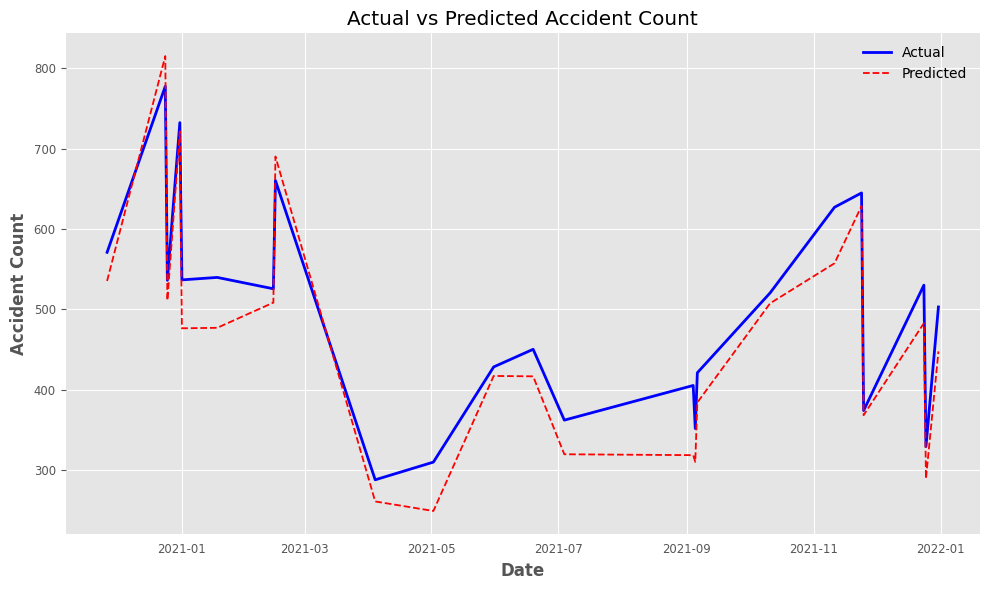

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # MAPE

# Print metrics
print(f"Evaluation Metrics for Accident Count Forecasting:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Visualize Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue', linewidth=2)
plt.plot(y_test.index, y_pred, label='Predicted', color='red', linestyle='--')
plt.title("Actual vs Predicted Accident Count")
plt.xlabel("Date")
plt.ylabel("Accident Count")
plt.legend()
plt.tight_layout()
plt.show()



<ipython-input-398-af10dc9f6be0>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




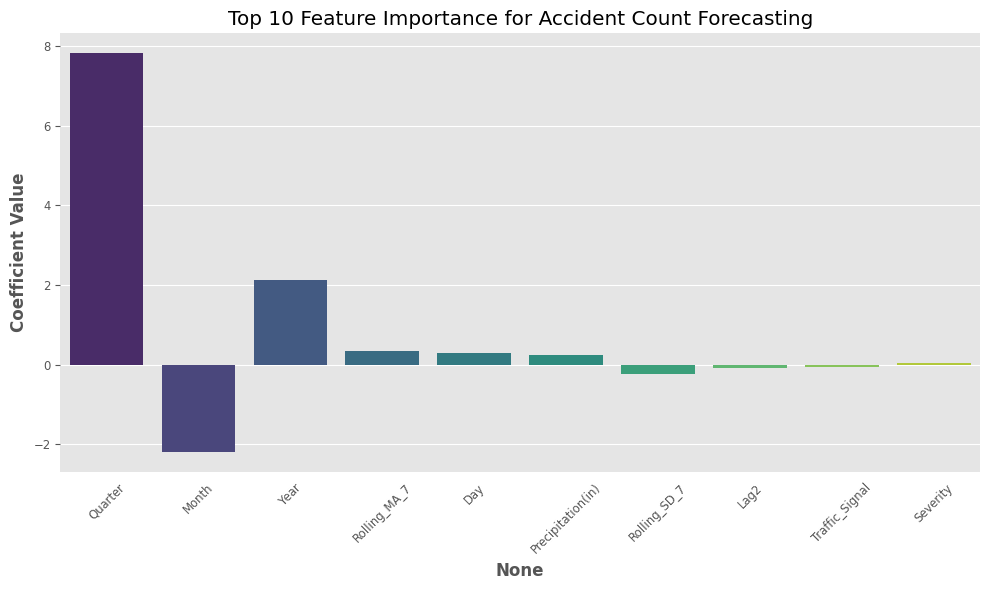

In [ ]:
# Feature Importance (coefficients from the Linear Regression model)
coefficients = pd.Series(model.coef_, index=X_train.columns)

# Get the top 10 features based on absolute coefficient values
top_10_features = coefficients.abs().nlargest(10).index  # Get top 10 by absolute values
top_10_coefficients = coefficients[top_10_features]      # Subset the coefficients to these features

# Plot feature importance for top 10 features
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_coefficients.index, y=top_10_coefficients.values, palette="viridis")
plt.title('Top 10 Feature Importance for Accident Count Forecasting')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##**Decision Tree**


Evaluation Metrics for Decision Tree Regressor:
Mean Squared Error (MSE): 15251.29
Root Mean Squared Error (RMSE): 123.50
Mean Absolute Error (MAE): 94.78
R² Score: 0.11
Mean Absolute Percentage Error (MAPE): 19.90%


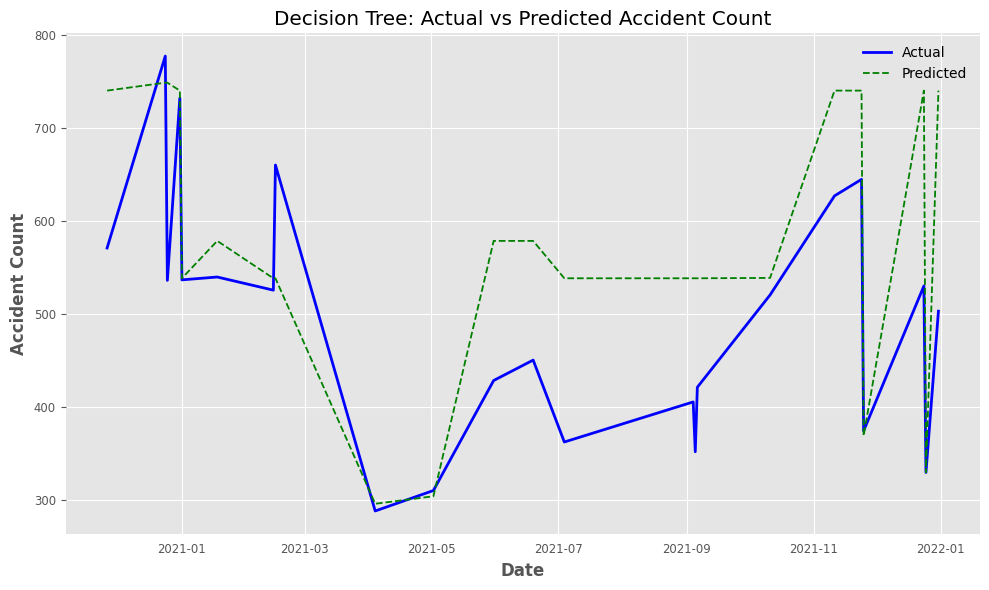

<ipython-input-399-f6aa4d1f234f>:50: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




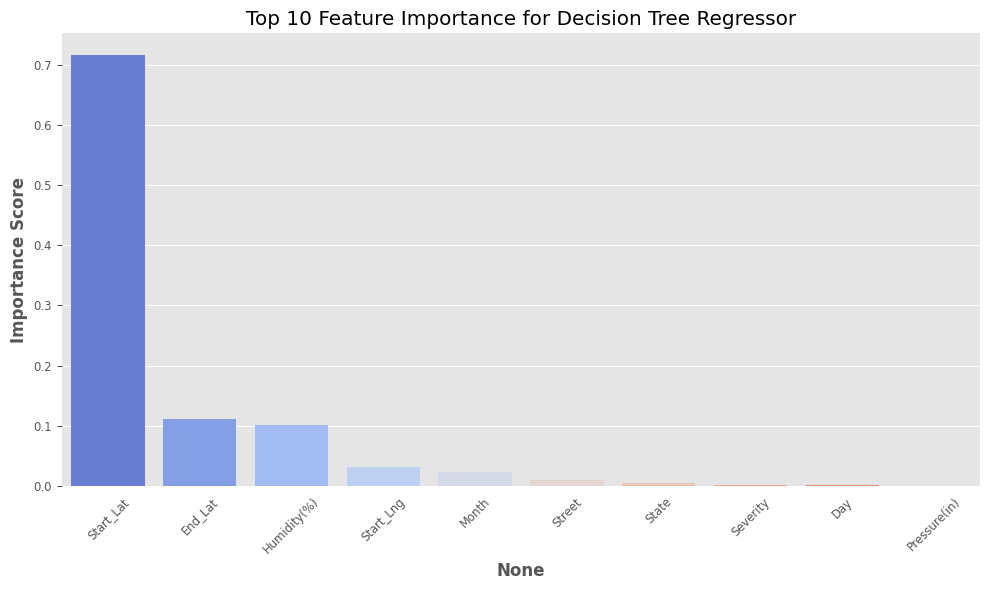

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42, max_depth=10)

# Train the model
tree_model.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree_model.predict(X_test)

# Calculate evaluation metrics
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
mape_tree = np.mean(np.abs((y_test - y_pred_tree) / y_test)) * 100  # MAPE

# Print metrics
print(f"Evaluation Metrics for Decision Tree Regressor:")
print(f"Mean Squared Error (MSE): {mse_tree:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tree:.2f}")
print(f"Mean Absolute Error (MAE): {mae_tree:.2f}")
print(f"R² Score: {r2_tree:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_tree:.2f}%")

# Visualize Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue', linewidth=2)
plt.plot(y_test.index, y_pred_tree, label='Predicted', color='green', linestyle='--')
plt.title("Decision Tree: Actual vs Predicted Accident Count")
plt.xlabel("Date")
plt.ylabel("Accident Count")
plt.legend()
plt.tight_layout()
plt.show()

# Feature Importance
importances = pd.Series(tree_model.feature_importances_, index=X_train.columns)

# Get the top 10 important features
top_10_features_tree = importances.nlargest(10)

# Plot feature importance for top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_features_tree.index, y=top_10_features_tree.values, palette="coolwarm")
plt.title('Top 10 Feature Importance for Decision Tree Regressor')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##**Random forest**


Evaluation Metrics for Random Forest Regressor:
Mean Squared Error (MSE): 564.30
Root Mean Squared Error (RMSE): 23.75
Mean Absolute Error (MAE): 17.47
R² Score: 0.97
Mean Absolute Percentage Error (MAPE): 3.22%


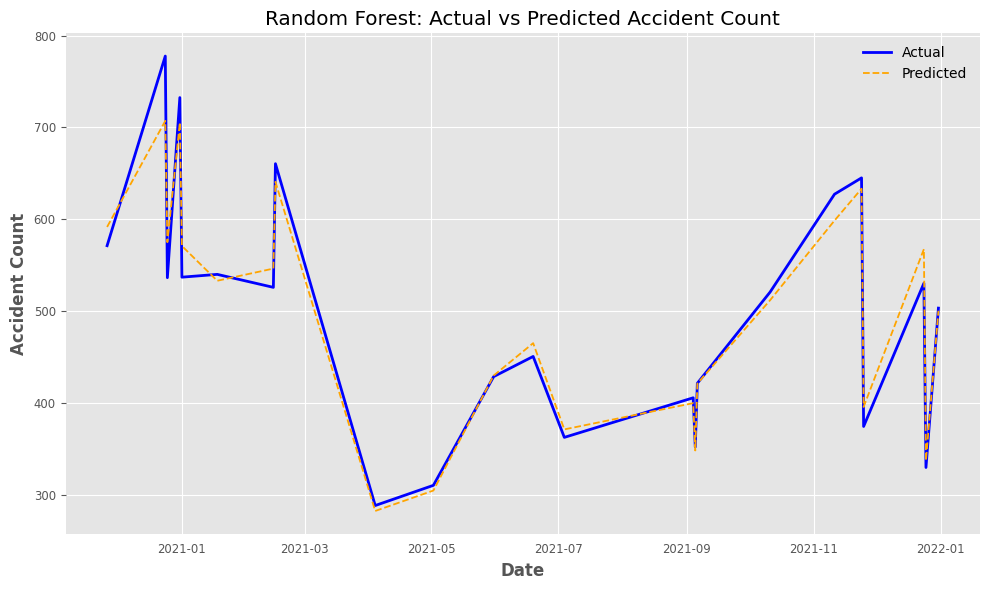

<ipython-input-404-ad781b49815b>:46: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




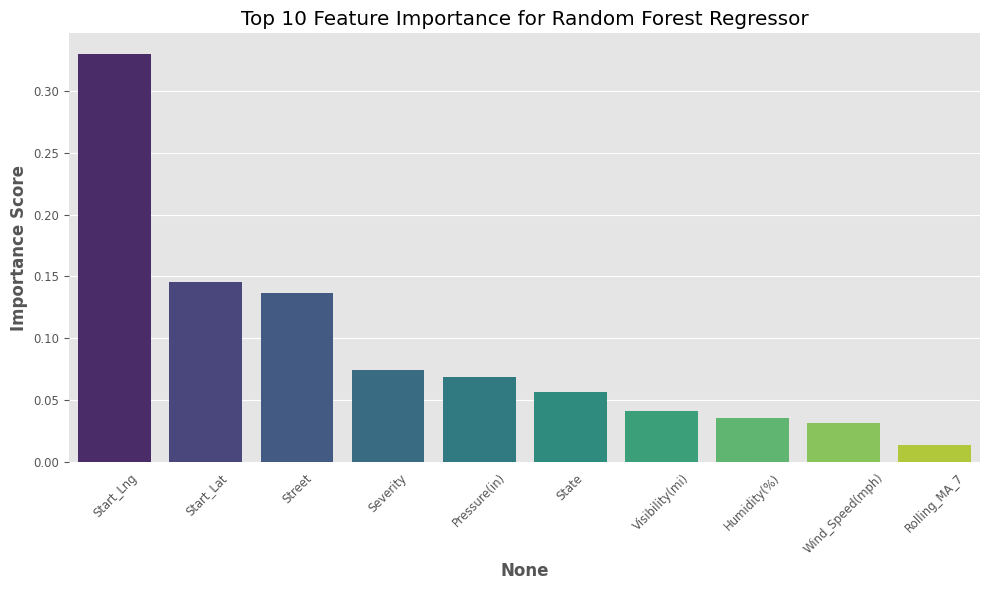

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100  # MAPE

# Print metrics
print(f"Evaluation Metrics for Random Forest Regressor:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_rf:.2f}%")

# Visualize Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue', linewidth=2)
plt.plot(y_test.index, y_pred_rf, label='Predicted', color='orange', linestyle='--')
plt.title("Random Forest: Actual vs Predicted Accident Count")
plt.xlabel("Date")
plt.ylabel("Accident Count")
plt.legend()
plt.tight_layout()
plt.show()

# Feature Importance
importances_rf = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# Get the top 10 important features
top_10_features_rf = importances_rf.nlargest(10)

# Plot feature importance for top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_features_rf.index, y=top_10_features_rf.values, palette="viridis")
plt.title('Top 10 Feature Importance for Random Forest Regressor')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## **Gradient Boosting.**

Evaluation Metrics for Gradient Boosting Regressor:
Mean Squared Error (MSE): 495.97
Root Mean Squared Error (RMSE): 22.27
Mean Absolute Error (MAE): 16.99
R² Score: 0.97
Mean Absolute Percentage Error (MAPE): 3.38%


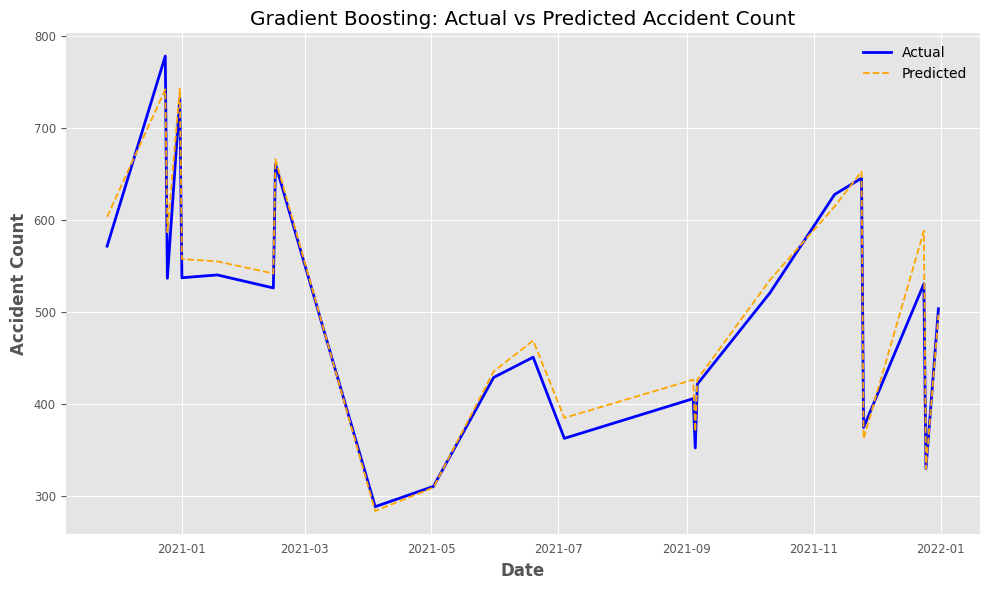

<ipython-input-405-c43e6502cb55>:63: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




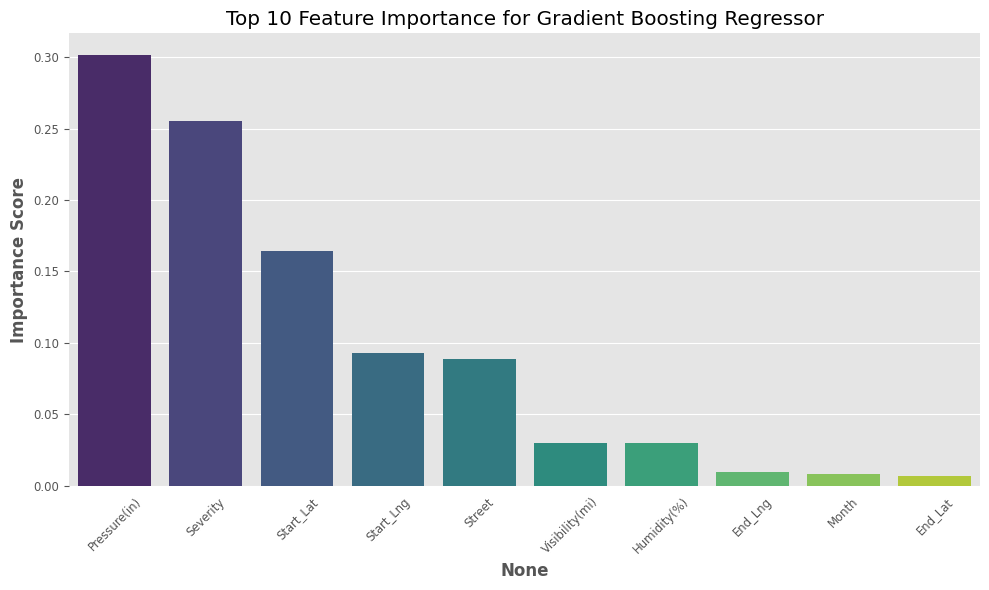

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor


gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42, max_depth=10)
train_size = int(len(M_df) * 0.8)
train, test = M_df[:train_size], M_df[train_size:]

X_train = train[['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Street', 'State', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Traffic_Signal',
       'Holiday',  'Month', 'Day', 'Year', 'Quarter', 'Rolling_MA_7', 'Rolling_MA_14', 'Rolling_SD_7', 'Lag1',
       'Lag2', 'Lag3']]

y_train = train['Daily_Accident_Count']
X_test = test[['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Street', 'State', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Traffic_Signal',
       'Holiday',  'Month', 'Day', 'Year', 'Quarter', 'Rolling_MA_7', 'Rolling_MA_14', 'Rolling_SD_7', 'Lag1',
       'Lag2', 'Lag3']]
y_test = test['Daily_Accident_Count']
# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Calculate evaluation metrics
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
mape_gb = np.mean(np.abs((y_test - y_pred_gb) / y_test)) * 100  # MAPE

# Print metrics
print(f"Evaluation Metrics for Gradient Boosting Regressor:")
print(f"Mean Squared Error (MSE): {mse_gb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gb:.2f}")
print(f"Mean Absolute Error (MAE): {mae_gb:.2f}")
print(f"R² Score: {r2_gb:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_gb:.2f}%")

# Visualize Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue', linewidth=2)
plt.plot(y_test.index, y_pred_gb, label='Predicted', color='orange', linestyle='--')
plt.title("Gradient Boosting: Actual vs Predicted Accident Count")
plt.xlabel("Date")
plt.ylabel("Accident Count")
plt.legend()
plt.tight_layout()
plt.show()

# Feature Importance
importances_gb = pd.Series(gb_model.feature_importances_, index=X_train.columns)

# Get the top 10 important features
top_10_features_gb = importances_gb.nlargest(10)

# Plot feature importance for top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_features_gb.index, y=top_10_features_gb.values, palette="viridis")
plt.title('Top 10 Feature Importance for Gradient Boosting Regressor')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## **XGBoost**

Evaluation Metrics for XGBoost Regressor:
Mean Squared Error (MSE): 2535.57
Root Mean Squared Error (RMSE): 50.35
Mean Absolute Error (MAE): 38.79
R² Score: 0.85
Mean Absolute Percentage Error (MAPE): 7.12%


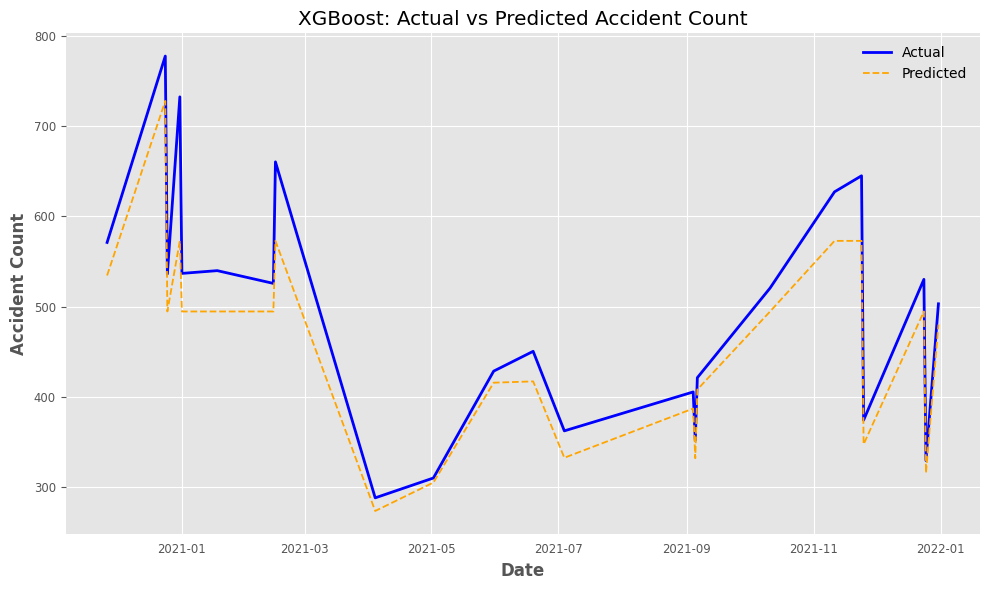

<ipython-input-406-0435b0f96db0>:46: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




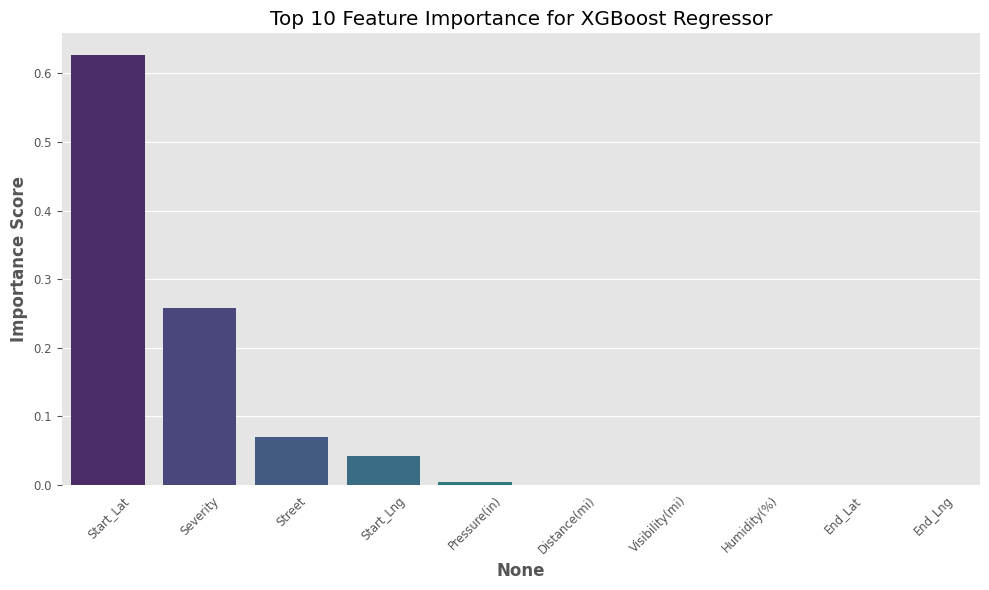

In [ ]:
from xgboost import XGBRegressor

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=6, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Calculate evaluation metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mape_xgb = np.mean(np.abs((y_test - y_pred_xgb) / y_test)) * 100  # MAPE

# Print metrics
print(f"Evaluation Metrics for XGBoost Regressor:")
print(f"Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.2f}")
print(f"Mean Absolute Error (MAE): {mae_xgb:.2f}")
print(f"R² Score: {r2_xgb:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_xgb:.2f}%")

# Visualize Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue', linewidth=2)
plt.plot(y_test.index, y_pred_xgb, label='Predicted', color='orange', linestyle='--')
plt.title("XGBoost: Actual vs Predicted Accident Count")
plt.xlabel("Date")
plt.ylabel("Accident Count")
plt.legend()
plt.tight_layout()
plt.show()

# Feature Importance
importances_xgb = pd.Series(xgb_model.feature_importances_, index=X_train.columns)

# Get the top 10 important features
top_10_features_xgb = importances_xgb.nlargest(10)

# Plot feature importance for top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_features_xgb.index, y=top_10_features_xgb.values, palette="viridis")
plt.title('Top 10 Feature Importance for XGBoost Regressor')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#5. Evaluation Metrics

---



##ML

In [ ]:


# Initialize dictionary to store metrics for each model
metrics = {
    'Model': [],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'R²': [],
    'MAPE': []
}

# Linear Regression Evaluation (Assume metrics are already computed for this model)
metrics['Model'].append('Linear Regression')
metrics['MSE'].append(mse)  # Use the actual MSE value calculated for Linear Regression
metrics['RMSE'].append(rmse)
metrics['MAE'].append(mae)
metrics['R²'].append(r2)
metrics['MAPE'].append(mape)

# Decision Trees Evaluation (Assume metrics are already computed for this model)
metrics['Model'].append('Decision Trees')
metrics['MSE'].append(mse_tree)
metrics['RMSE'].append(rmse_tree)
metrics['MAE'].append(mae_tree)
metrics['R²'].append(r2_tree)
metrics['MAPE'].append(mape_tree)

# Random Forests Evaluation (Assume metrics are already computed for this model)
metrics['Model'].append('Random Forests')
metrics['MSE'].append(mse_rf)
metrics['RMSE'].append(rmse_rf)
metrics['MAE'].append(mae_rf)
metrics['R²'].append(r2_rf)
metrics['MAPE'].append(mape_rf)

# Gradient Boosting Evaluation (Assume metrics are already computed for this model)
metrics['Model'].append('Gradient Boosting')
metrics['MSE'].append(mse_gb)
metrics['RMSE'].append(rmse_gb)
metrics['MAE'].append(mae_gb)
metrics['R²'].append(r2_gb)
metrics['MAPE'].append(mape_gb)


# Convert metrics dictionary to DataFrame for better visualization
metrics_df = pd.DataFrame(metrics)

# Print the metrics table
print(metrics_df)


               Model          MSE       RMSE        MAE        R²      MAPE
0  Linear Regression  1847.342859  42.980727  37.680898  0.892348  8.273015
1     Decision Trees  4155.832638  64.465748  43.480950  0.757822  7.464930
2     Random Forests   564.295138  23.754897  17.474037  0.967116  3.219797
3  Gradient Boosting   495.971382  22.270415  16.993161  0.971098  3.375263


<ipython-input-408-5c6909450c1a>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-408-5c6909450c1a>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-408-5c6909450c1a>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-408-5c6909450c1a>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-408-5c6909450c1a>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated a

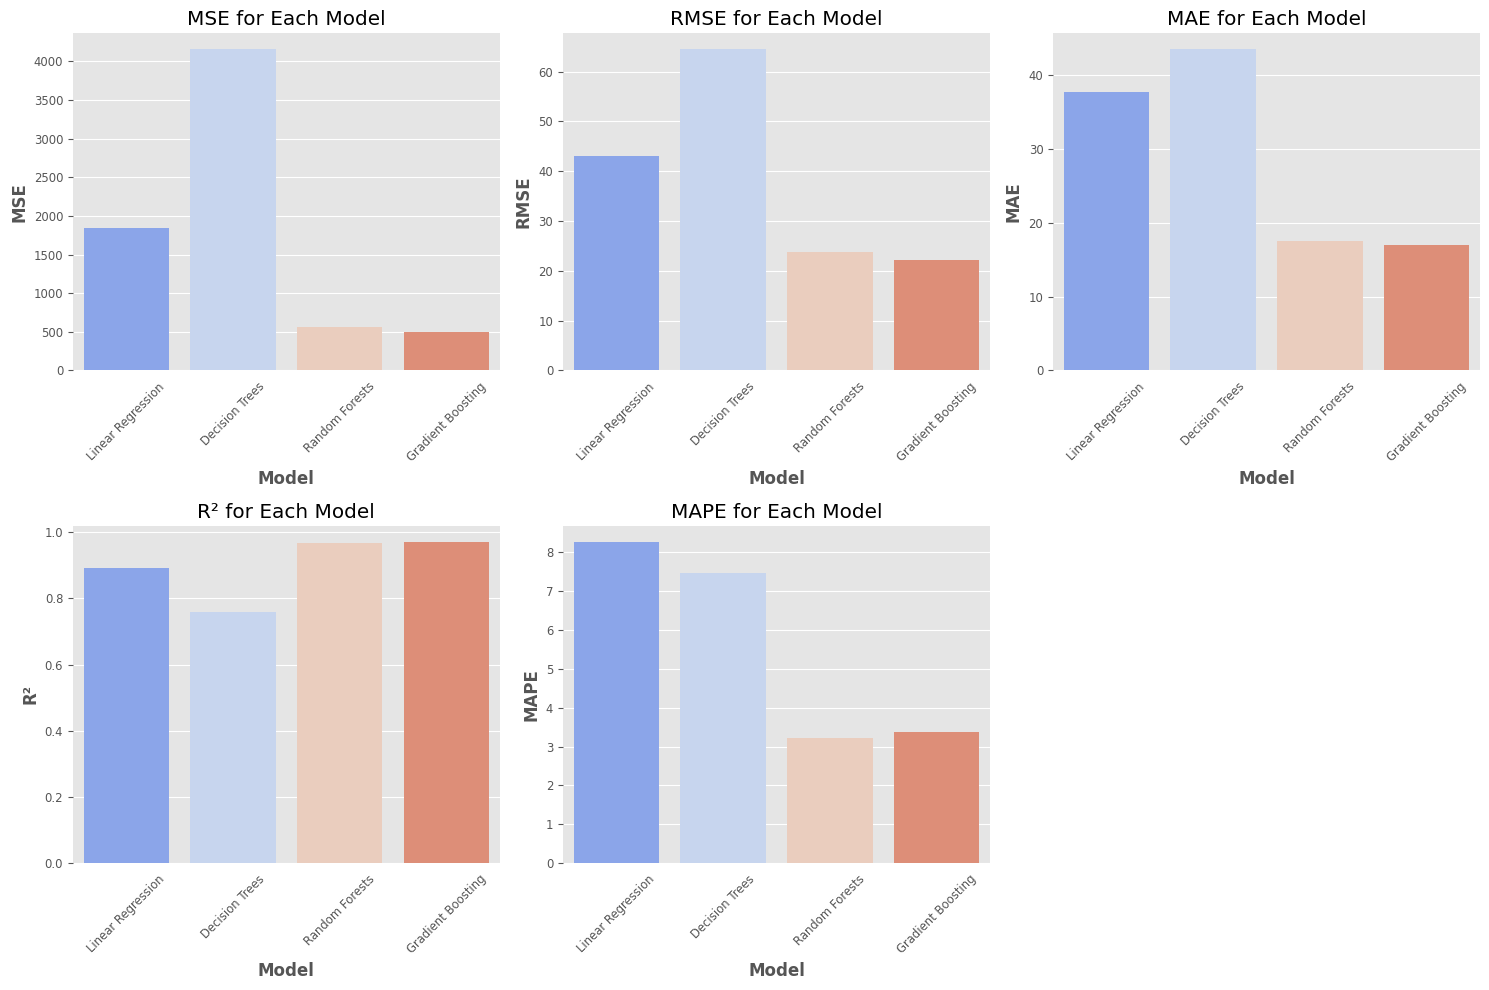

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of metrics to plot
metrics_to_plot = ['MSE', 'RMSE', 'MAE', 'R²', 'MAPE']

# Set up the plot size
plt.figure(figsize=(15, 10))

# Loop through the metrics to generate separate bar plots
for i, metric in enumerate(metrics_to_plot, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns for subplots
    sns.barplot(x='Model', y=metric, data=metrics_df, palette='coolwarm')
    plt.title(f'{metric} for Each Model')
    plt.ylabel(metric)
    plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [ ]:
pip install tabulate


In [ ]:
from tabulate import tabulate

# Convert the metrics dictionary to a list of lists for tabulation
table_data = zip(metrics['Model'], metrics['MSE'], metrics['RMSE'], metrics['MAE'], metrics['R²'], metrics['MAPE'])

# Print the table in a nice format
headers = ["Model", "MSE", "RMSE", "MAE", "R²", "MAPE"]
print(tabulate(table_data, headers=headers, tablefmt="fancy_grid"))


╒═══════════════════╤══════════╤═════════╤═════════╤══════════╤═════════╕
│ Model             │      MSE │    RMSE │     MAE │       R² │    MAPE │
╞═══════════════════╪══════════╪═════════╪═════════╪══════════╪═════════╡
│ Linear Regression │ 1847.34  │ 42.9807 │ 37.6809 │ 0.892348 │ 8.27301 │
├───────────────────┼──────────┼─────────┼─────────┼──────────┼─────────┤
│ Decision Trees    │ 4155.83  │ 64.4657 │ 43.4809 │ 0.757822 │ 7.46493 │
├───────────────────┼──────────┼─────────┼─────────┼──────────┼─────────┤
│ Random Forests    │  564.295 │ 23.7549 │ 17.474  │ 0.967116 │ 3.2198  │
├───────────────────┼──────────┼─────────┼─────────┼──────────┼─────────┤
│ Gradient Boosting │  495.971 │ 22.2704 │ 16.9932 │ 0.971098 │ 3.37526 │
╘═══════════════════╧══════════╧═════════╧═════════╧══════════╧═════════╛


In [ ]:
# Apply styles to the pandas DataFrame for better visibility
styled_df = metrics_df.style.highlight_max(axis=0, color='lightgreen').background_gradient(cmap='Blues')
styled_df


<ipython-input-412-13878f29e293>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-412-13878f29e293>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-412-13878f29e293>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-412-13878f29e293>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-412-13878f29e293>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated a

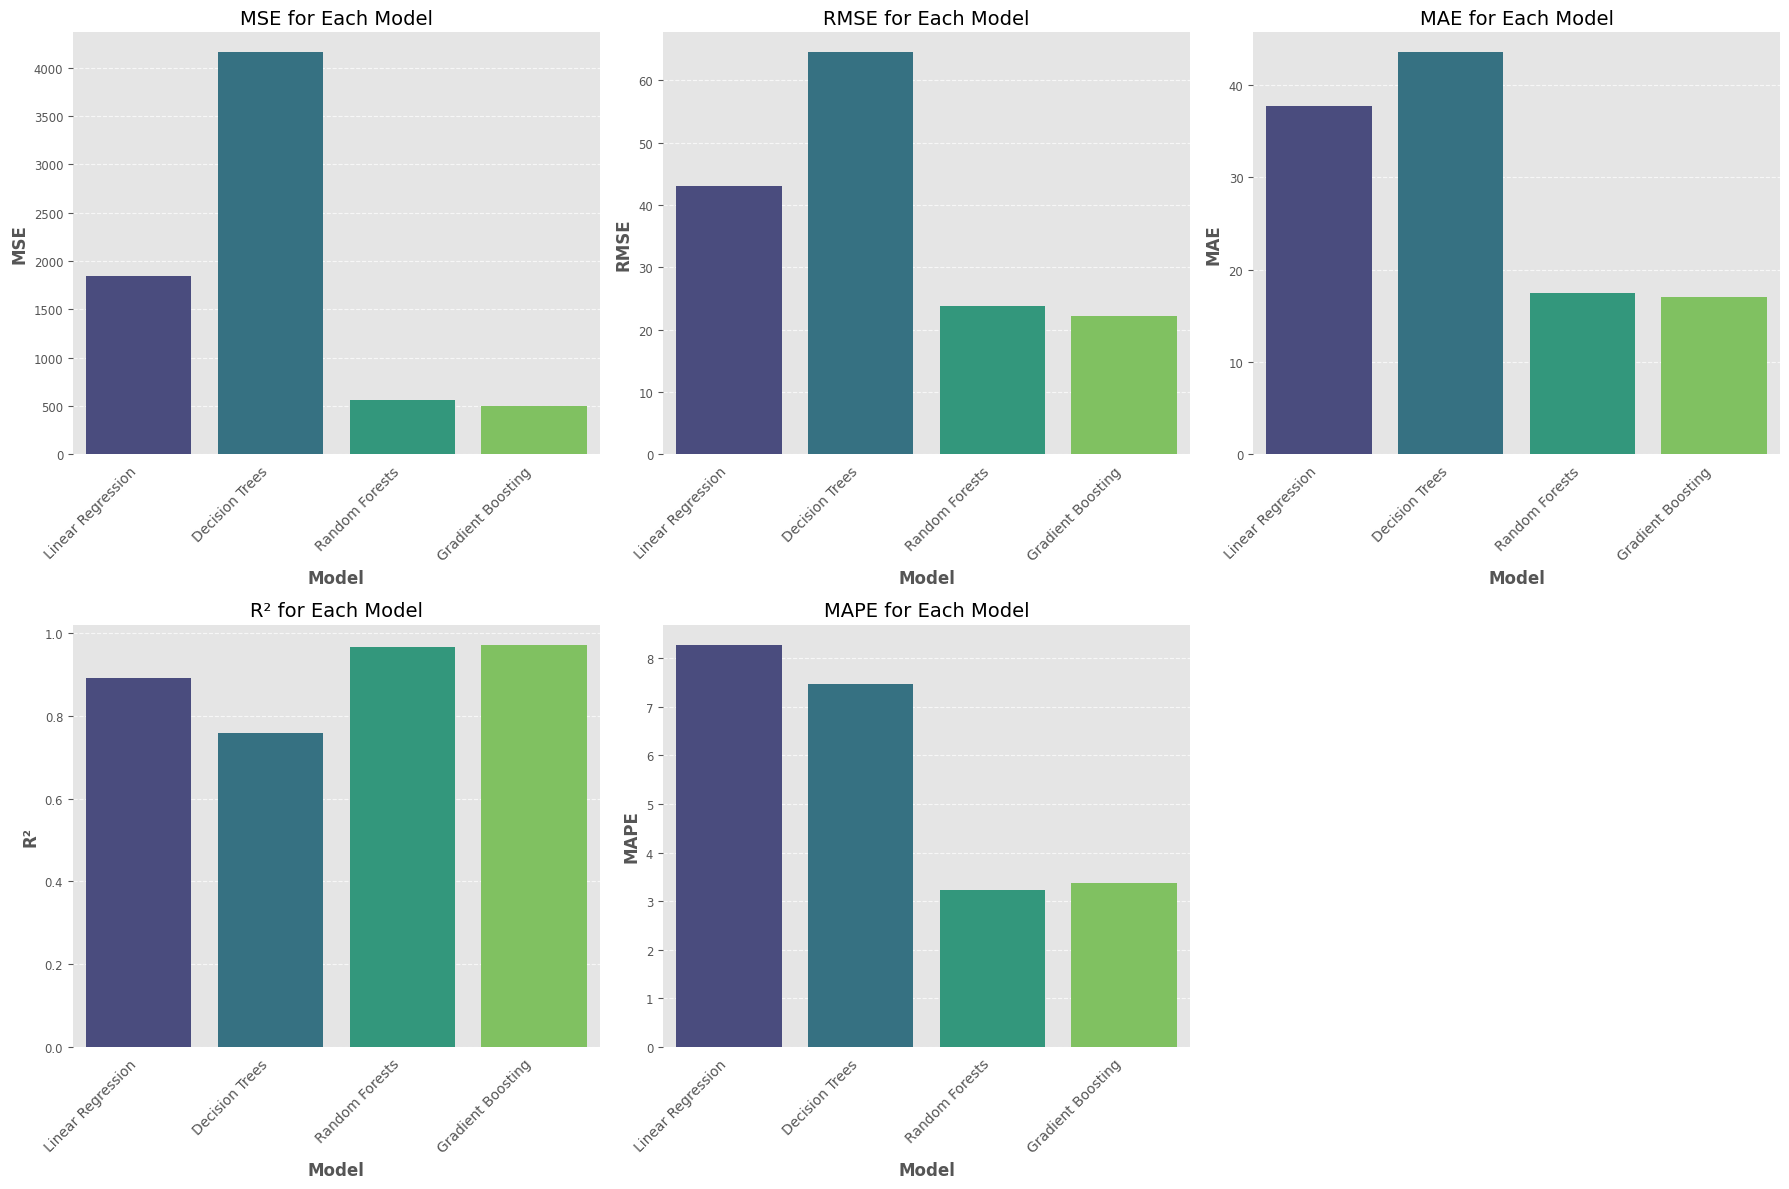

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of metrics to plot
metrics_to_plot = ['MSE', 'RMSE', 'MAE', 'R²', 'MAPE']

# Set up the plot size
plt.figure(figsize=(18, 12))

# Loop through the metrics to generate separate bar plots
for i, metric in enumerate(metrics_to_plot, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns for subplots

    # Use a distinct color palette for better contrast
    sns.barplot(x='Model', y=metric, data=metrics_df, palette='viridis')

    # Set the title and labels
    plt.title(f'{metric} for Each Model', fontsize=14)
    plt.ylabel(metric, fontsize=12)
    plt.xlabel('Model', fontsize=12)

    # Rotate x-axis labels for readability
    plt.xticks(rotation=45, ha='right', fontsize=10)

    # Add grid lines for better readability
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent overlap and make room for labels
plt.tight_layout()

# Show the plot
plt.show()


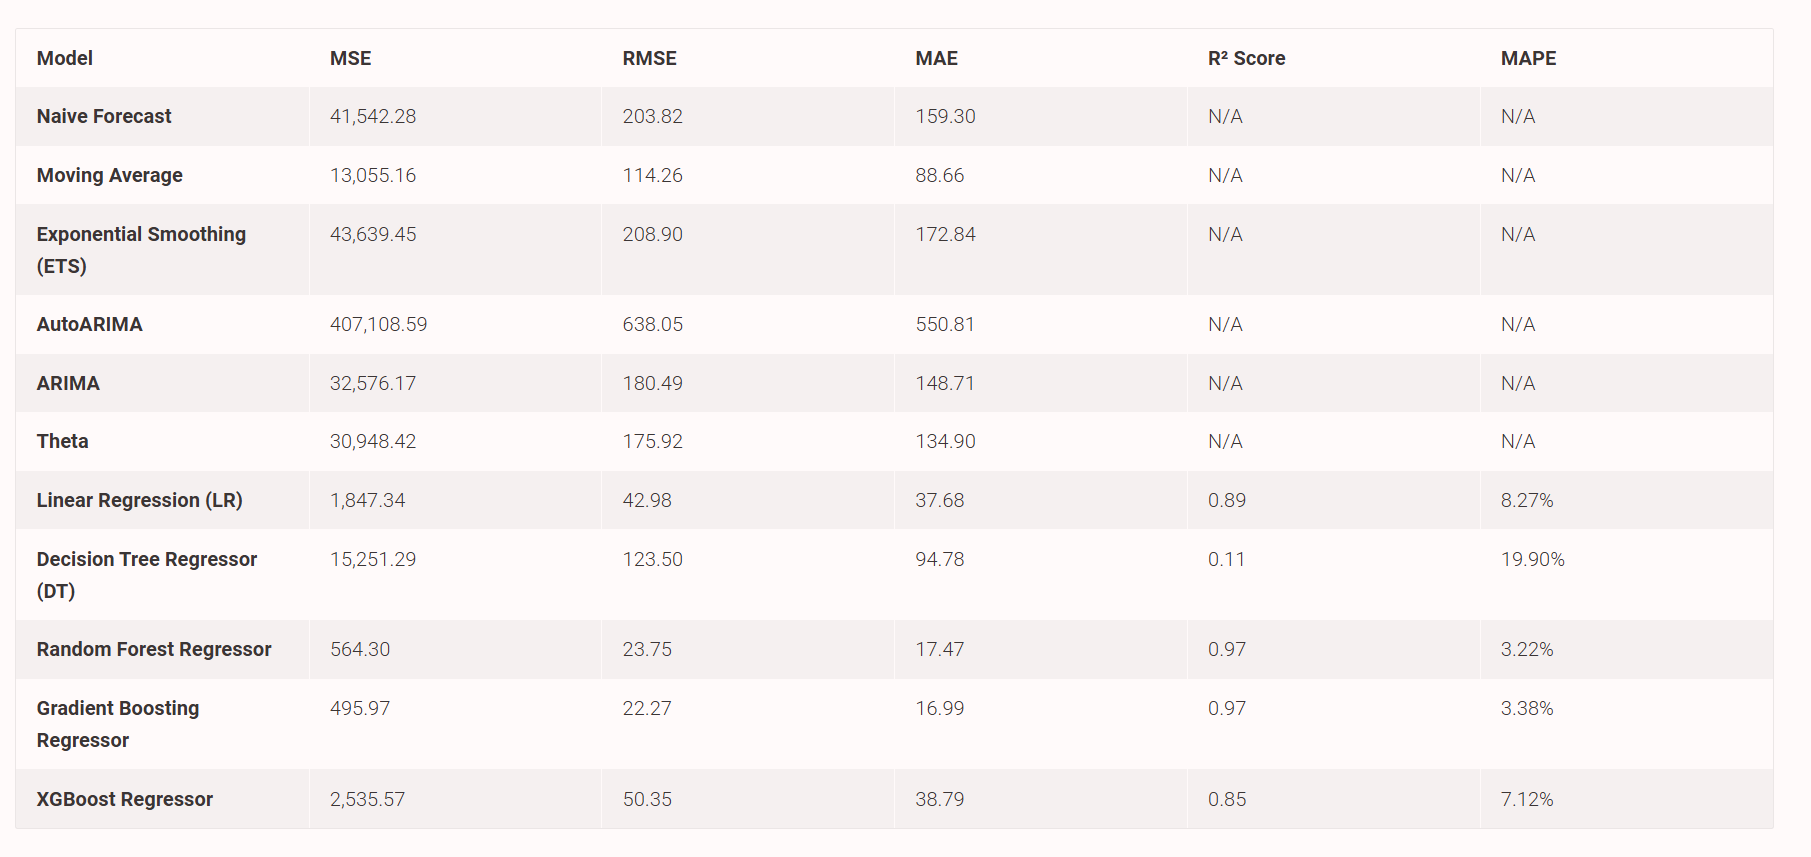

# 6. Hyperparameter Tuning

---



##linear

Mean Squared Error: 6227.359532781506


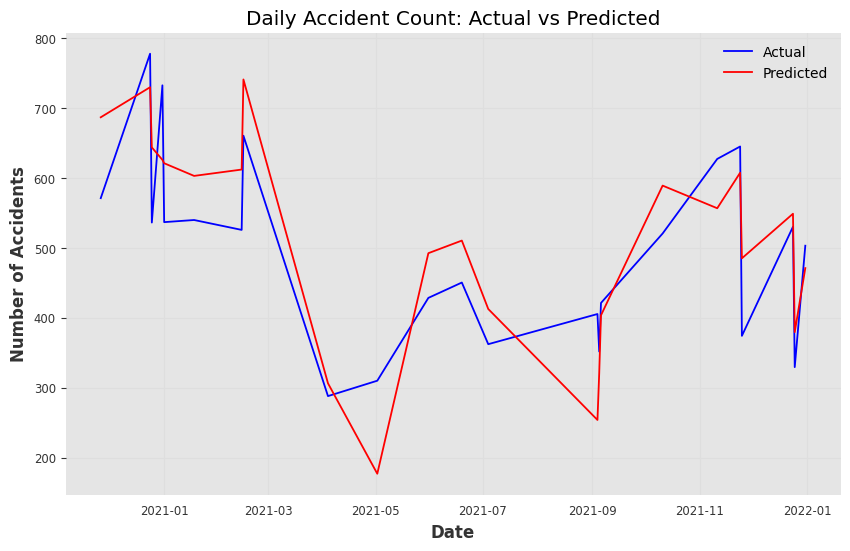

Evaluation Metrics for Accident Count Forecasting:
Mean Squared Error (MSE): 6227.36
Root Mean Squared Error (RMSE): 78.91
Mean Absolute Error (MAE): 69.78
R² Score: 0.64
Mean Absolute Percentage Error (MAPE): 14.93%


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

train_size = int(len(M_df) * 0.8)
train, test = M_df[:train_size], M_df[train_size:]

X_train = train[[ 'Quarter', 'Rolling_MA_7', 'Rolling_MA_14', 'Rolling_SD_7', 'Lag1',
       'Lag2', 'Lag3',  'day_of_week', 'month', 'year']]

y_train = train['Daily_Accident_Count']
X_test = test[[ 'Quarter', 'Rolling_MA_7', 'Rolling_MA_14', 'Rolling_SD_7', 'Lag1',
       'Lag2', 'Lag3',  'day_of_week', 'month', 'year']]
y_test = test['Daily_Accident_Count']
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot actual vs predicted
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='red')
plt.title("Daily Accident Count: Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Number of Accidents")
plt.legend()
plt.show()

# Feature Importance (coefficients from the Linear Regression model)
coefficients = pd.Series(model.coef_, index=X_train.columns)

from sklearn.metrics import mean_absolute_error, r2_score

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # MAPE

# Print metrics
print(f"Evaluation Metrics for Accident Count Forecasting:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# # Visualize Actual vs Predicted
# plt.figure(figsize=(10, 6))
# plt.plot(y_test.index, y_test, label='Actual', color='blue', linewidth=2)
# plt.plot(y_test.index, y_pred, label='Predicted', color='red', linestyle='--')
# plt.title("Actual vs Predicted Accident Count")
# plt.xlabel("Date")
# plt.ylabel("Accident Count")
# plt.legend()
# plt.tight_layout()
# plt.show()




##Tree

In [ ]:

from sklearn.model_selection import GridSearchCV



Evaluation Metrics for Decision Tree Regressor:
Mean Squared Error (MSE): 4155.83
Root Mean Squared Error (RMSE): 64.47
Mean Absolute Error (MAE): 43.48
R² Score: 0.76
Mean Absolute Percentage Error (MAPE): 7.46%


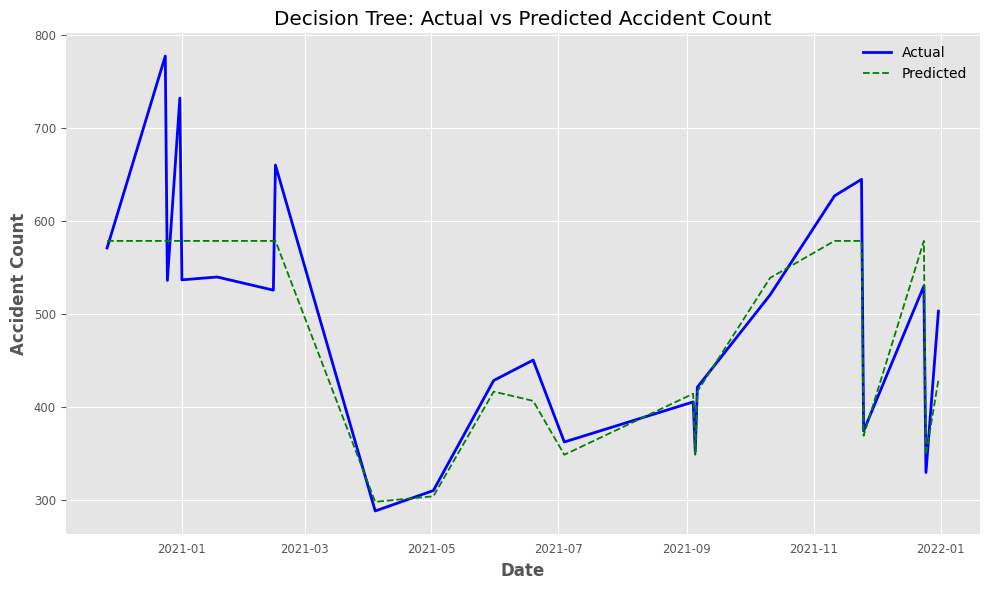

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=2, max_depth=100)

# Train the model
tree_model.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree_model.predict(X_test)

# Calculate evaluation metrics
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
mape_tree = np.mean(np.abs((y_test - y_pred_tree) / y_test)) * 100  # MAPE

# Print metrics
print(f"Evaluation Metrics for Decision Tree Regressor:")
print(f"Mean Squared Error (MSE): {mse_tree:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tree:.2f}")
print(f"Mean Absolute Error (MAE): {mae_tree:.2f}")
print(f"R² Score: {r2_tree:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_tree:.2f}%")

# Visualize Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue', linewidth=2)
plt.plot(y_test.index, y_pred_tree, label='Predicted', color='green', linestyle='--')
plt.title("Decision Tree: Actual vs Predicted Accident Count")
plt.xlabel("Date")
plt.ylabel("Accident Count")
plt.legend()
plt.tight_layout()
plt.show()



##random

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning:


102 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
49 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Best Hyperparameters: {'bootstrap': False, 'max_depth': 31, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 838}
Evaluation Metrics for Random Forest Regressor (Tuned with RandomizedSearchCV):
Mean Squared Error (MSE): 9362.18
Root Mean Squared Error (RMSE): 96.76
Mean Absolute Error (MAE): 78.15
R² Score: 0.45
Mean Absolute Percentage Error (MAPE): 16.93%


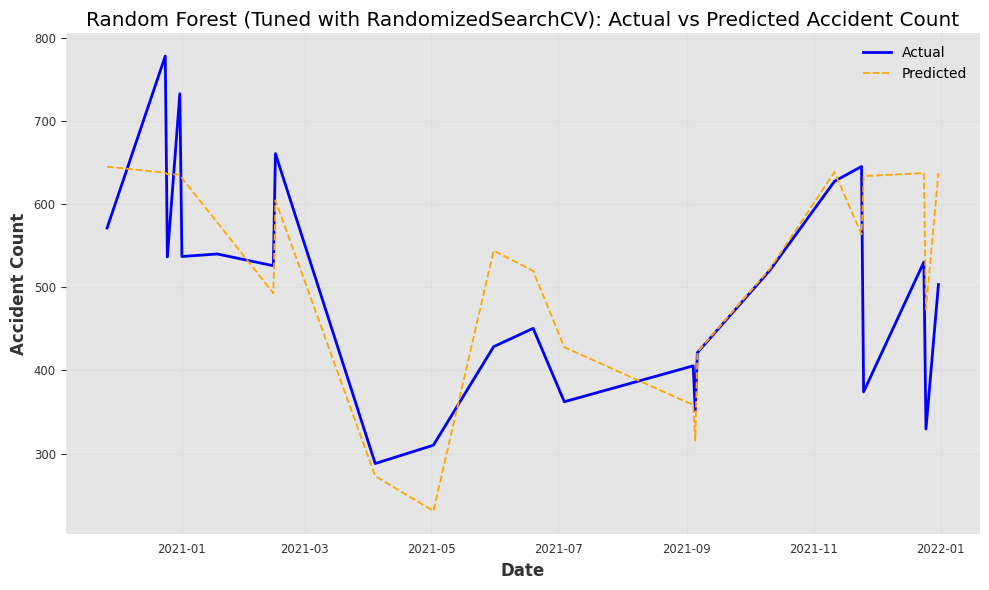

<ipython-input-77-014fcc0f3f31>:66: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




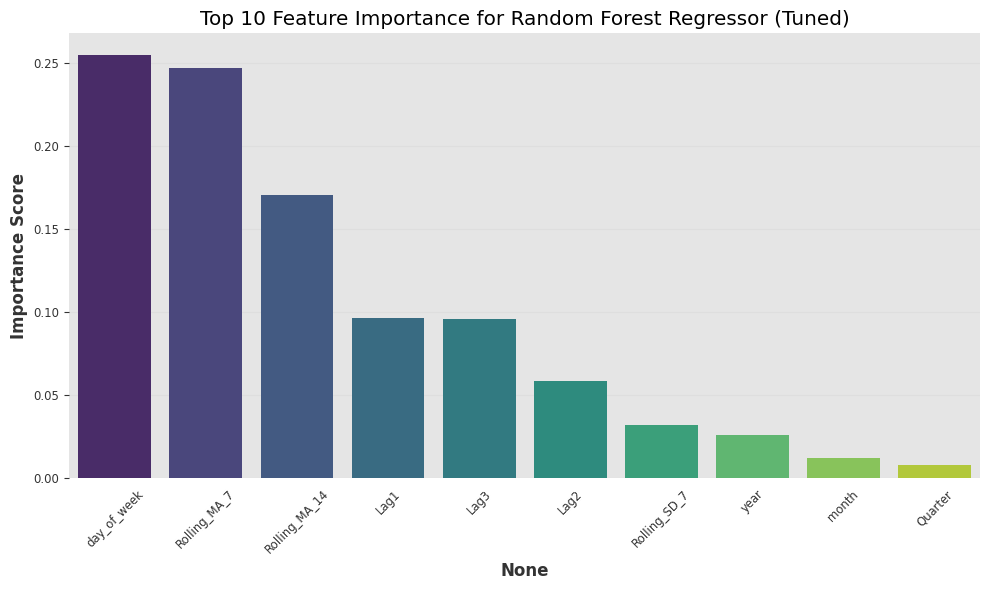

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter space to search
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}


rf_model = RandomForestRegressor(random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist,
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)


# Fit the random search model
random_search.fit(X_train, y_train)

# Best hyperparameters
best_rf_model = random_search.best_estimator_
print(f"Best Hyperparameters: {random_search.best_params_}")

# Make predictions
y_pred_rf = best_rf_model.predict(X_test)

# Calculate evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100  # MAPE

# Print metrics
print(f"Evaluation Metrics for Random Forest Regressor (Tuned with RandomizedSearchCV):")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_rf:.2f}%")

# Visualize Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue', linewidth=2)
plt.plot(y_test.index, y_pred_rf, label='Predicted', color='orange', linestyle='--')
plt.title("Random Forest (Tuned with RandomizedSearchCV): Actual vs Predicted Accident Count")
plt.xlabel("Date")
plt.ylabel("Accident Count")
plt.legend()
plt.tight_layout()
plt.show()

# Feature Importance
importances_rf = pd.Series(best_rf_model.feature_importances_, index=X_train.columns)

# Get the top 10 important features
top_10_features_rf = importances_rf.nlargest(10)

# Plot feature importance for top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_features_rf.index, y=top_10_features_rf.values, palette="viridis")
plt.title('Top 10 Feature Importance for Random Forest Regressor (Tuned)')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## ARIMA

Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) ACF: Shows the correlation between the time series and its lagged values. It is useful for identifying the MA (Moving Average) order. PACF: Shows the correlation between the time series and its lagged values after removing the effects of shorter lags. It is useful for identifying the AR (Autoregressive) order.

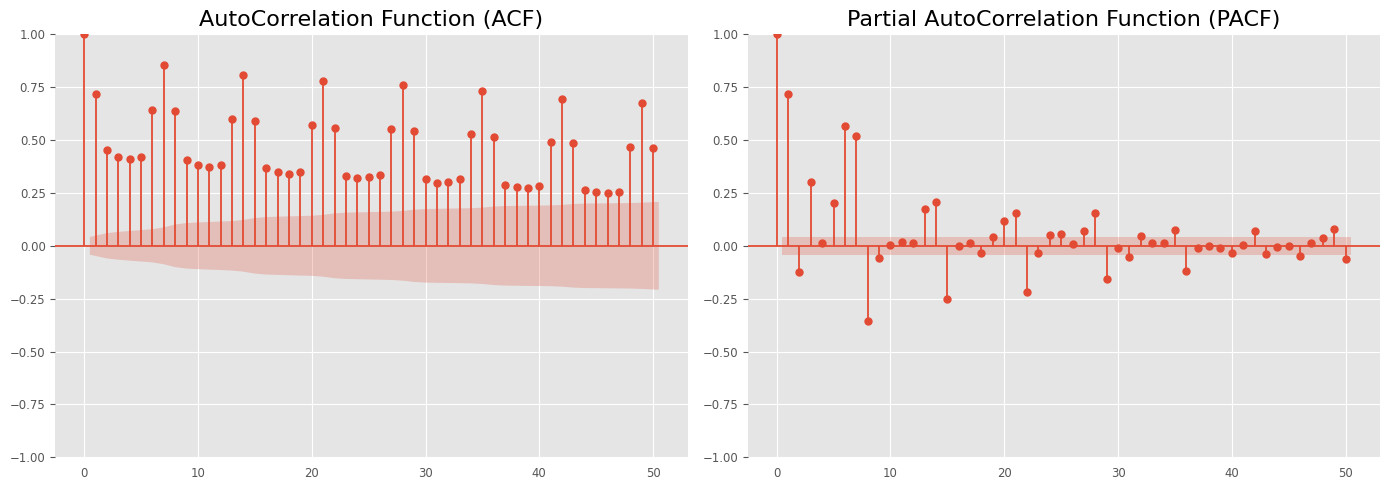

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create the figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot the AutoCorrelation Function (ACF)
plot_acf(M_df['Daily_Accident_Count'], lags=50, ax=axes[0])
axes[0].set_title('AutoCorrelation Function (ACF)', fontsize=16)

# Plot the Partial AutoCorrelation Function (PACF)
plot_pacf(M_df['Daily_Accident_Count'], lags=50, ax=axes[1])
axes[1].set_title('Partial AutoCorrelation Function (PACF)', fontsize=16)

# Display the plots
plt.tight_layout()
plt.show()


            Severity   Start_Lat   Start_Lng     End_Lat     End_Lng  \
Date                                                                   
2016-01-14        28  284.414263 -528.294242  284.412044 -528.301879   
2016-01-15         0    0.000000    0.000000    0.000000    0.000000   
2016-01-16         0    0.000000    0.000000    0.000000    0.000000   
2016-01-17         0    0.000000    0.000000    0.000000    0.000000   
2016-01-18         0    0.000000    0.000000    0.000000    0.000000   

            Distance(mi)   Street  State  Temperature(F)  Wind_Chill(F)  ...  \
Date                                                                     ...   
2016-01-14         0.427  1757294    252           217.0          217.0  ...   
2016-01-15         0.000        0      0             0.0            0.0  ...   
2016-01-16         0.000        0      0             0.0            0.0  ...   
2016-01-17         0.000        0      0             0.0            0.0  ...   
2016-01-18     

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning:

m (12) set for non-seasonal fit. Setting to 0



 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=26414.671, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=27059.753, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=27058.864, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=26778.968, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=27057.761, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=26080.094, Time=0.55 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=26656.894, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=26082.010, Time=0.85 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=26078.137, Time=0.79 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=26122.347, Time=0.50 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=26040.756, Time=1.10 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=25691.831, Time=1.86 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=25955.852, Time=1.49 sec
 ARIMA(3,1,3)(0,0,0)[0]             : AIC=inf, Time=1.35 sec

Best model:  ARIMA(3,1,3)(0,0,0)[0] intercept
Total fit time: 9.366

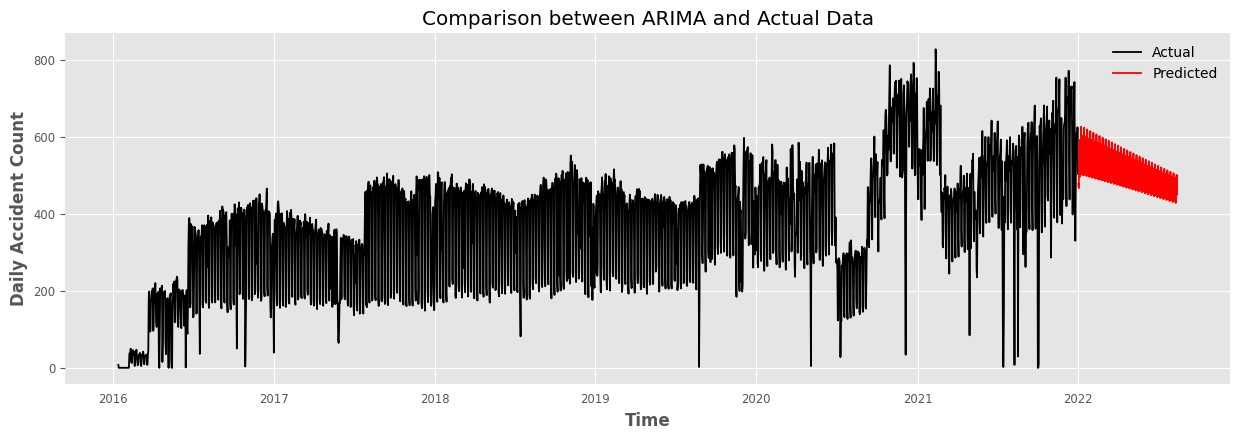

In [ ]:
import pandas as pd
import pmdarima as pm
import matplotlib.pyplot as plt

def index_time(df, attribute):
    temp = df.reset_index()
    temp[attribute] = pd.to_datetime(temp[attribute], errors='coerce')
    df = temp.set_index(attribute)
    return df

M_df = index_time(M_df, 'Date')


print(M_df.head())

# Fit the ARIMA model
results = pm.auto_arima(
    M_df['Daily_Accident_Count'],
    start_p=1, start_q=1, max_p=3, max_q=3,
    m=12,
    seasonal=False,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

# Make predictions (for the next 225 points)
n_periods = 225
preds = results.predict(n_periods=n_periods)

# Create a new index for the prediction period
pred_index = pd.date_range(M_df.index[-1], periods=n_periods + 1, freq='D')[1:]

# Convert predictions to a DataFrame with the correct index
preds_df = pd.DataFrame(preds, index=pred_index, columns=['Predicted'])

# Plot the results
fig = plt.gcf()
fig.set_size_inches(12.5, 4.5)
plt.title('Comparison between ARIMA and Actual Data')
plt.xlabel('Time')
plt.ylabel('Daily Accident Count')

# Plot actual data (use all available data for the actual series)
plt.plot(M_df['Daily_Accident_Count'], label='Actual', color='black')

# Plot predicted data
plt.plot(preds_df, label='Predicted', color='red')

# Add legend and show plot
plt.legend()
plt.tight_layout()
plt.show()


## XGBoost

Evaluation Metrics for XGBoost Regressor:
Mean Squared Error (MSE): 15196.85
Root Mean Squared Error (RMSE): 123.28
Mean Absolute Error (MAE): 100.46
R² Score: 0.11
Mean Absolute Percentage Error (MAPE): 19.26%


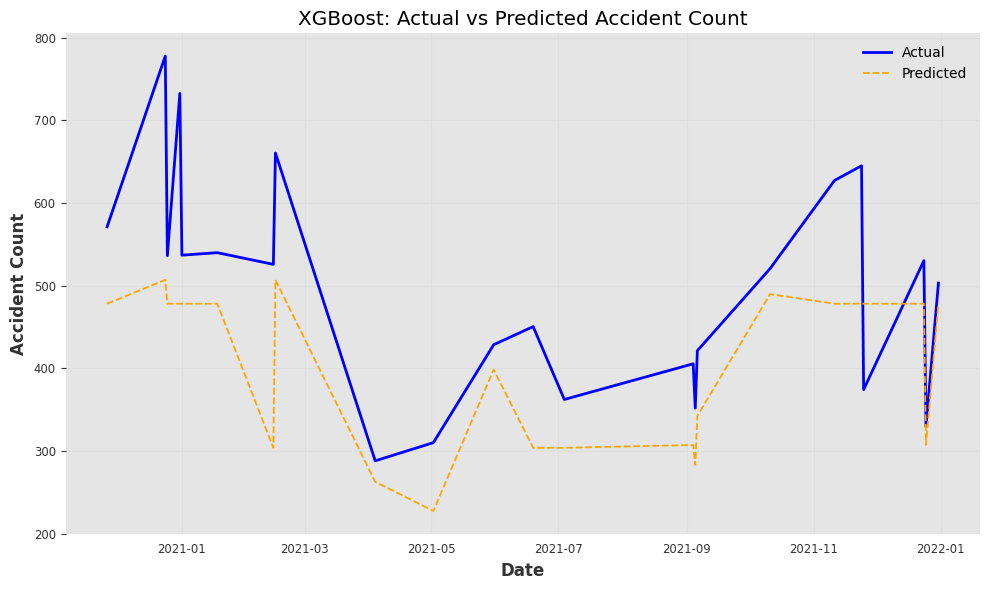

<ipython-input-80-ae25c8db5521>:46: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




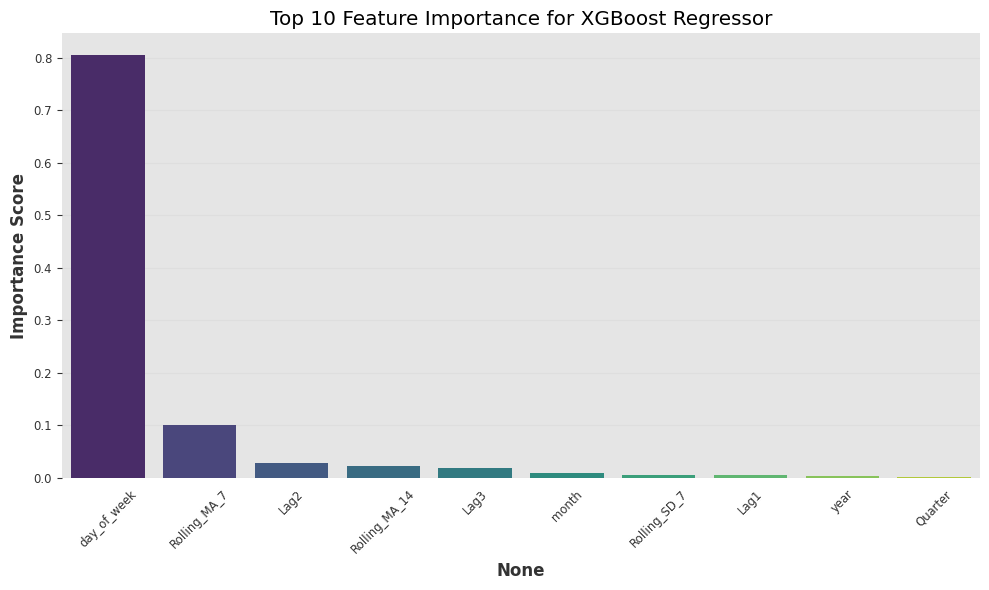

In [ ]:
from xgboost import XGBRegressor

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=20, learning_rate=0.05, max_depth=60, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Calculate evaluation metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mape_xgb = np.mean(np.abs((y_test - y_pred_xgb) / y_test)) * 100  # MAPE

# Print metrics
print(f"Evaluation Metrics for XGBoost Regressor:")
print(f"Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.2f}")
print(f"Mean Absolute Error (MAE): {mae_xgb:.2f}")
print(f"R² Score: {r2_xgb:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_xgb:.2f}%")

# Visualize Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue', linewidth=2)
plt.plot(y_test.index, y_pred_xgb, label='Predicted', color='orange', linestyle='--')
plt.title("XGBoost: Actual vs Predicted Accident Count")
plt.xlabel("Date")
plt.ylabel("Accident Count")
plt.legend()
plt.tight_layout()
plt.show()

# Feature Importance
importances_xgb = pd.Series(xgb_model.feature_importances_, index=X_train.columns)

# Get the top 10 important features
top_10_features_xgb = importances_xgb.nlargest(10)

# Plot feature importance for top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_features_xgb.index, y=top_10_features_xgb.values, palette="viridis")
plt.title('Top 10 Feature Importance for XGBoost Regressor')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
